In [2]:
import numpy as np
import torch
from torch import nn

In [67]:
class ShallowRegressionLSTM(nn.Module):
    def __init__(self, num_sensors, hidden_units):
        super().__init__()
        self.num_sensors = num_sensors  # this is the number of features
        self.hidden_units = hidden_units
        self.num_layers = 1

        self.lstm = nn.LSTM(
            input_size=num_sensors,
            hidden_size=hidden_units,
            batch_first=True,
            num_layers=self.num_layers
        )

        self.linear = nn.Linear(in_features=self.hidden_units, out_features=1)

    def forward(self, x):
        batch_size = x.shape[0]
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_units).requires_grad_()
        
        _, (hn, _) = self.lstm(x, (h0, c0))
        out = self.linear(hn[0]).flatten()  # First dim of Hn is num_layers, which is set to 1 above.

        return out
    
num_hidden_units = 16
num_sensors = 1
model = ShallowRegressionLSTM(num_sensors=num_sensors, hidden_units=num_hidden_units)

In [72]:
model(torch.zeros((10, 16, 1, 1)))

RuntimeError: For unbatched 2-D input, hx and cx should also be 2-D but got (3-D, 3-D) tensors

In [65]:
x = torch.zeros((28))
print(x.size())
lstm1(x)

torch.Size([28])


RuntimeError: input must have 3 dimensions, got 2

In [118]:
seq_length = 4


class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out
     


num_epochs = 2
learning_rate = 0.01

input_size = 1
hidden_size = 128
num_layers = 8

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)


target_len = 100
target_freq = 10
target = np.sin(np.linspace(0, target_freq*2*np.pi, target_len))

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(torch.zeros(128,1,1))
    print(outputs.size())
    print(outputs[-1])
    optimizer.zero_grad()
    
    # obtain the loss function
    #loss = criterion(outputs, trainY)
    
    #loss.backward()
    
    #optimizer.step()
    #if epoch % 100 == 0:
    #  print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
     


torch.Size([1024, 1])
tensor([-0.0821], grad_fn=<SelectBackward0>)
torch.Size([1024, 1])
tensor([-0.0821], grad_fn=<SelectBackward0>)


In [105]:
target

array([ 0.00000000e+00,  5.92907929e-01,  9.54902241e-01,  9.45000819e-01,
        5.67059864e-01, -3.17279335e-02, -6.18158986e-01, -9.63842159e-01,
       -9.34147860e-01, -5.40640817e-01,  6.34239197e-02,  6.42787610e-01,
        9.71811568e-01,  9.22354294e-01,  5.13677392e-01, -9.50560433e-02,
       -6.66769001e-01, -9.78802446e-01, -9.09631995e-01, -4.86196736e-01,
        1.26592454e-01,  6.90079011e-01,  9.84807753e-01,  8.95993774e-01,
        4.58226522e-01, -1.58001396e-01, -7.12694171e-01, -9.89821442e-01,
       -8.81453363e-01, -4.29794912e-01,  1.89251244e-01,  7.34591709e-01,
        9.93838464e-01,  8.66025404e-01,  4.00930535e-01, -2.20310533e-01,
       -7.55749574e-01, -9.96854776e-01, -8.49725430e-01, -3.71662456e-01,
        2.51147987e-01,  7.76146464e-01,  9.98867339e-01,  8.32569855e-01,
        3.42020143e-01, -2.81732557e-01, -7.95761841e-01, -9.99874128e-01,
       -8.14575952e-01, -3.12033446e-01,  3.12033446e-01,  8.14575952e-01,
        9.99874128e-01,  

In [148]:
seq_length = 4


class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out
     


num_training_steps = 20000000000000
learning_rate = 0.01

input_size = 1
hidden_size = 128
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)


target_len = 1000
target_freq = 5
time_arr = torch.from_numpy(np.linspace(0, target_freq*2*np.pi, target_len).astype(np.float32))
target = torch.sin(time_arr)
sample_len = 200

# Train the model
for step in range(num_training_steps):
    start = int(np.random.rand(1)*(target_len-sample_len))
    end = start + sample_len
    x = time_arr[start:end]
    x = torch.reshape(x, (-1, 1, 1))
    y = target[start:end]
    outputs = lstm(x)
    #print('Inputs: ', x.shape, '\tOutputs: ', outputs.shape)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, y)
    
    loss.backward()
    
    #optimizer.step()
    if step % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))
     


/home/bij/anaconda3/envs/Torch/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([200])) that is different to the input size (torch.Size([200, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 96668, loss: 0.54005
Epoch: 96668, loss: 0.53243
Epoch: 96668, loss: 0.51091
Epoch: 96668, loss: 0.52623
Epoch: 96668, loss: 0.50317
Epoch: 96668, loss: 0.50290
Epoch: 96668, loss: 0.50631
Epoch: 96668, loss: 0.53229
Epoch: 96668, loss: 0.52973
Epoch: 96668, loss: 0.50684
Epoch: 96668, loss: 0.52845
Epoch: 96668, loss: 0.52718
Epoch: 96668, loss: 0.53761
Epoch: 96668, loss: 0.53257
Epoch: 96668, loss: 0.50514
Epoch: 96668, loss: 0.53315
Epoch: 96668, loss: 0.51529
Epoch: 96668, loss: 0.53815
Epoch: 96668, loss: 0.50321
Epoch: 96668, loss: 0.52965
Epoch: 96668, loss: 0.51533
Epoch: 96668, loss: 0.51499
Epoch: 96668, loss: 0.51812
Epoch: 96668, loss: 0.52804
Epoch: 96668, loss: 0.50672
Epoch: 96668, loss: 0.52748
Epoch: 96668, loss: 0.53873
Epoch: 96668, loss: 0.53322
Epoch: 96668, loss: 0.50771
Epoch: 96668, loss: 0.51037
Epoch: 96668, loss: 0.50367
Epoch: 96668, loss: 0.50589
Epoch: 96668, loss: 0.52594
Epoch: 96668, loss: 0.50540
Epoch: 96668, loss: 0.50170
Epoch: 96668, loss: 

Epoch: 96668, loss: 0.50943
Epoch: 96668, loss: 0.51043
Epoch: 96668, loss: 0.51720
Epoch: 96668, loss: 0.51527
Epoch: 96668, loss: 0.53148
Epoch: 96668, loss: 0.51328
Epoch: 96668, loss: 0.50690
Epoch: 96668, loss: 0.50826
Epoch: 96668, loss: 0.53171
Epoch: 96668, loss: 0.50313
Epoch: 96668, loss: 0.51690
Epoch: 96668, loss: 0.51446
Epoch: 96668, loss: 0.50458
Epoch: 96668, loss: 0.52107
Epoch: 96668, loss: 0.50690
Epoch: 96668, loss: 0.52032
Epoch: 96668, loss: 0.50329
Epoch: 96668, loss: 0.51382
Epoch: 96668, loss: 0.53329
Epoch: 96668, loss: 0.53014
Epoch: 96668, loss: 0.50891
Epoch: 96668, loss: 0.50657
Epoch: 96668, loss: 0.51015
Epoch: 96668, loss: 0.50367
Epoch: 96668, loss: 0.51501
Epoch: 96668, loss: 0.50514
Epoch: 96668, loss: 0.53868
Epoch: 96668, loss: 0.50546
Epoch: 96668, loss: 0.50362
Epoch: 96668, loss: 0.50363
Epoch: 96668, loss: 0.51416
Epoch: 96668, loss: 0.50365
Epoch: 96668, loss: 0.50447
Epoch: 96668, loss: 0.51782
Epoch: 96668, loss: 0.51279
Epoch: 96668, loss: 

KeyboardInterrupt: 

In [136]:
from matplotlib import pyplot as plt

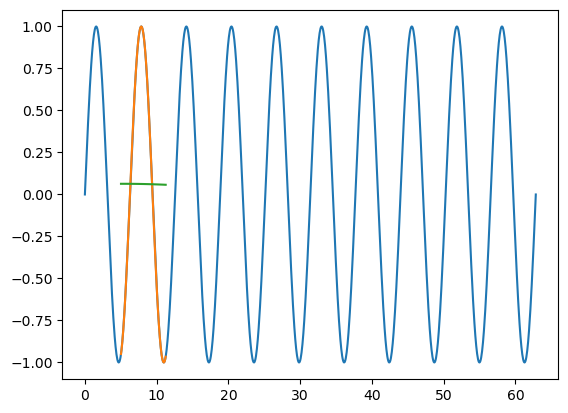

In [147]:
plt.plot(time_arr, target)
plt.plot(torch.squeeze(x), y)
plt.plot(torch.squeeze(x), outputs.detach())
plt.show()

In [9]:
seq_length = 4

from torch.autograd import Variable

class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        #self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        #out = self.fc(h_out)
        
        #return out
        return h_out
     


num_training_steps = 20000000000000
learning_rate = 0.01

input_size = 1
output_size = 1
hidden_size = 128
num_layers = 1


lstm = LSTM(output_size, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)


target_len = 1000
target_freq = 5
time_arr = torch.from_numpy(np.linspace(0, target_freq*2*np.pi, target_len).astype(np.float32))
target = torch.sin(time_arr)
sample_len = 200

# (BS, w, input_size)
x = torch.zeros((1, 128, 1))
y_hat = lstm(x)

print(x.size(), y_hat.size())
    

torch.Size([1, 128, 1]) torch.Size([1, 128])


In [15]:
seq_length = 4

from torch.autograd import Variable

class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        #self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size)).cuda()
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size)).cuda()
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        #out = self.fc(h_out)
        
        #return out
        return h_out
     


num_training_steps = 20000000000000
learning_rate = 0.01

input_size = 1
output_size = 1
hidden_size = 128
num_layers = 1


lstm = LSTM(output_size, input_size, hidden_size, num_layers).cuda()

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)


target_len = 1000
target_freq = 5
time_arr = torch.from_numpy(np.linspace(0, target_freq*2*np.pi, target_len).astype(np.float32)).cuda()
target = torch.sin(time_arr).cuda()
sample_len = 128

# (BS, w, input_size)
#x = torch.zeros((1, 128, 1))
#y_hat = lstm(x)

print(x.size(), y_hat.size())

# Train the model
for step in range(num_training_steps):
    start = int(np.random.rand(1)*(target_len-sample_len))
    end = start + sample_len
    x = time_arr[start:end]
    x = torch.reshape(x, (1, sample_len, 1))
    y = target[start:end]
    outputs = lstm(x)
    #print('Inputs: ', x.shape, '\tOutputs: ', outputs.shape)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, y)
    
    loss.backward()
    
    #optimizer.step()
    if step % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (step, loss.item()))
     
    

torch.Size([1, 128, 1]) torch.Size([1, 128])
Epoch: 0, loss: 0.48667
Epoch: 100, loss: 0.75382
Epoch: 200, loss: 0.62475
Epoch: 300, loss: 0.60093
Epoch: 400, loss: 0.68912
Epoch: 500, loss: 0.63938
Epoch: 600, loss: 0.65592
Epoch: 700, loss: 0.47119
Epoch: 800, loss: 0.66395
Epoch: 900, loss: 0.64607
Epoch: 1000, loss: 0.55092
Epoch: 1100, loss: 0.61690
Epoch: 1200, loss: 0.61406
Epoch: 1300, loss: 0.45348
Epoch: 1400, loss: 0.64578
Epoch: 1500, loss: 0.54933
Epoch: 1600, loss: 0.51737
Epoch: 1700, loss: 0.61059
Epoch: 1800, loss: 0.66404
Epoch: 1900, loss: 0.63109
Epoch: 2000, loss: 0.63789
Epoch: 2100, loss: 0.45151
Epoch: 2200, loss: 0.49115
Epoch: 2300, loss: 0.52827
Epoch: 2400, loss: 0.71981
Epoch: 2500, loss: 0.45777
Epoch: 2600, loss: 0.57330
Epoch: 2700, loss: 0.55024
Epoch: 2800, loss: 0.45220
Epoch: 2900, loss: 0.59463
Epoch: 3000, loss: 0.55851
Epoch: 3100, loss: 0.69705
Epoch: 3200, loss: 0.54603
Epoch: 3300, loss: 0.60393
Epoch: 3400, loss: 0.60707
Epoch: 3500, loss: 0.6

Epoch: 29500, loss: 0.52602
Epoch: 29600, loss: 0.49555
Epoch: 29700, loss: 0.61453
Epoch: 29800, loss: 0.64393
Epoch: 29900, loss: 0.50735
Epoch: 30000, loss: 0.60574
Epoch: 30100, loss: 0.50917
Epoch: 30200, loss: 0.45625
Epoch: 30300, loss: 0.65505
Epoch: 30400, loss: 0.67609
Epoch: 30500, loss: 0.74041
Epoch: 30600, loss: 0.49244
Epoch: 30700, loss: 0.57874
Epoch: 30800, loss: 0.61138
Epoch: 30900, loss: 0.53126
Epoch: 31000, loss: 0.54445
Epoch: 31100, loss: 0.69740
Epoch: 31200, loss: 0.69903
Epoch: 31300, loss: 0.57314
Epoch: 31400, loss: 0.48636
Epoch: 31500, loss: 0.66226
Epoch: 31600, loss: 0.54657
Epoch: 31700, loss: 0.52473
Epoch: 31800, loss: 0.57779
Epoch: 31900, loss: 0.77060
Epoch: 32000, loss: 0.68738
Epoch: 32100, loss: 0.56638
Epoch: 32200, loss: 0.47197
Epoch: 32300, loss: 0.58522
Epoch: 32400, loss: 0.72660
Epoch: 32500, loss: 0.48990
Epoch: 32600, loss: 0.53622
Epoch: 32700, loss: 0.43342
Epoch: 32800, loss: 0.48502
Epoch: 32900, loss: 0.55552
Epoch: 33000, loss: 

Epoch: 58900, loss: 0.75352
Epoch: 59000, loss: 0.53541
Epoch: 59100, loss: 0.50742
Epoch: 59200, loss: 0.48952
Epoch: 59300, loss: 0.77343
Epoch: 59400, loss: 0.64976
Epoch: 59500, loss: 0.66746
Epoch: 59600, loss: 0.66606
Epoch: 59700, loss: 0.54518
Epoch: 59800, loss: 0.64550
Epoch: 59900, loss: 0.48352
Epoch: 60000, loss: 0.55190
Epoch: 60100, loss: 0.56329
Epoch: 60200, loss: 0.61564
Epoch: 60300, loss: 0.55537
Epoch: 60400, loss: 0.57744
Epoch: 60500, loss: 0.48265
Epoch: 60600, loss: 0.54639
Epoch: 60700, loss: 0.49629
Epoch: 60800, loss: 0.57157
Epoch: 60900, loss: 0.48515
Epoch: 61000, loss: 0.71940
Epoch: 61100, loss: 0.50546
Epoch: 61200, loss: 0.67217
Epoch: 61300, loss: 0.54575
Epoch: 61400, loss: 0.52174
Epoch: 61500, loss: 0.66837
Epoch: 61600, loss: 0.51667
Epoch: 61700, loss: 0.61315
Epoch: 61800, loss: 0.67469
Epoch: 61900, loss: 0.58291
Epoch: 62000, loss: 0.47584
Epoch: 62100, loss: 0.71088
Epoch: 62200, loss: 0.66124
Epoch: 62300, loss: 0.71563
Epoch: 62400, loss: 

Epoch: 88300, loss: 0.68620
Epoch: 88400, loss: 0.63889
Epoch: 88500, loss: 0.54772
Epoch: 88600, loss: 0.72891
Epoch: 88700, loss: 0.52473
Epoch: 88800, loss: 0.52631
Epoch: 88900, loss: 0.47342
Epoch: 89000, loss: 0.52665
Epoch: 89100, loss: 0.53578
Epoch: 89200, loss: 0.56904
Epoch: 89300, loss: 0.49115
Epoch: 89400, loss: 0.50797
Epoch: 89500, loss: 0.45681
Epoch: 89600, loss: 0.53548
Epoch: 89700, loss: 0.60636
Epoch: 89800, loss: 0.49406
Epoch: 89900, loss: 0.49897
Epoch: 90000, loss: 0.60991
Epoch: 90100, loss: 0.44185
Epoch: 90200, loss: 0.61331
Epoch: 90300, loss: 0.55498
Epoch: 90400, loss: 0.67421
Epoch: 90500, loss: 0.54046
Epoch: 90600, loss: 0.52595
Epoch: 90700, loss: 0.67096
Epoch: 90800, loss: 0.58778
Epoch: 90900, loss: 0.62965
Epoch: 91000, loss: 0.74573
Epoch: 91100, loss: 0.59807
Epoch: 91200, loss: 0.50256
Epoch: 91300, loss: 0.56349
Epoch: 91400, loss: 0.53719
Epoch: 91500, loss: 0.63109
Epoch: 91600, loss: 0.58843
Epoch: 91700, loss: 0.63066
Epoch: 91800, loss: 

Epoch: 117100, loss: 0.46111
Epoch: 117200, loss: 0.55024
Epoch: 117300, loss: 0.60393
Epoch: 117400, loss: 0.56644
Epoch: 117500, loss: 0.76737
Epoch: 117600, loss: 0.65668
Epoch: 117700, loss: 0.52035
Epoch: 117800, loss: 0.56816
Epoch: 117900, loss: 0.60697
Epoch: 118000, loss: 0.61640
Epoch: 118100, loss: 0.66395
Epoch: 118200, loss: 0.54553
Epoch: 118300, loss: 0.67963
Epoch: 118400, loss: 0.53281
Epoch: 118500, loss: 0.66664
Epoch: 118600, loss: 0.56615
Epoch: 118700, loss: 0.43008
Epoch: 118800, loss: 0.72660
Epoch: 118900, loss: 0.59106
Epoch: 119000, loss: 0.61546
Epoch: 119100, loss: 0.70821
Epoch: 119200, loss: 0.53339
Epoch: 119300, loss: 0.65945
Epoch: 119400, loss: 0.58090
Epoch: 119500, loss: 0.72660
Epoch: 119600, loss: 0.58085
Epoch: 119700, loss: 0.66722
Epoch: 119800, loss: 0.65649
Epoch: 119900, loss: 0.63014
Epoch: 120000, loss: 0.56329
Epoch: 120100, loss: 0.68578
Epoch: 120200, loss: 0.62744
Epoch: 120300, loss: 0.68195
Epoch: 120400, loss: 0.49406
Epoch: 120500,

Epoch: 145600, loss: 0.51252
Epoch: 145700, loss: 0.48553
Epoch: 145800, loss: 0.54719
Epoch: 145900, loss: 0.66926
Epoch: 146000, loss: 0.54222
Epoch: 146100, loss: 0.66426
Epoch: 146200, loss: 0.52368
Epoch: 146300, loss: 0.45220
Epoch: 146400, loss: 0.68747
Epoch: 146500, loss: 0.70804
Epoch: 146600, loss: 0.42749
Epoch: 146700, loss: 0.42697
Epoch: 146800, loss: 0.71355
Epoch: 146900, loss: 0.59524
Epoch: 147000, loss: 0.53616
Epoch: 147100, loss: 0.50611
Epoch: 147200, loss: 0.57540
Epoch: 147300, loss: 0.77789
Epoch: 147400, loss: 0.55175
Epoch: 147500, loss: 0.56267
Epoch: 147600, loss: 0.66204
Epoch: 147700, loss: 0.45808
Epoch: 147800, loss: 0.49645
Epoch: 147900, loss: 0.71308
Epoch: 148000, loss: 0.77476
Epoch: 148100, loss: 0.54820
Epoch: 148200, loss: 0.67836
Epoch: 148300, loss: 0.46632
Epoch: 148400, loss: 0.60946
Epoch: 148500, loss: 0.61640
Epoch: 148600, loss: 0.60355
Epoch: 148700, loss: 0.71308
Epoch: 148800, loss: 0.55641
Epoch: 148900, loss: 0.60581
Epoch: 149000,

Epoch: 174100, loss: 0.78164
Epoch: 174200, loss: 0.70508
Epoch: 174300, loss: 0.52701
Epoch: 174400, loss: 0.71108
Epoch: 174500, loss: 0.67762
Epoch: 174600, loss: 0.67664
Epoch: 174700, loss: 0.77696
Epoch: 174800, loss: 0.63943
Epoch: 174900, loss: 0.54878
Epoch: 175000, loss: 0.54820
Epoch: 175100, loss: 0.66736
Epoch: 175200, loss: 0.73277
Epoch: 175300, loss: 0.70804
Epoch: 175400, loss: 0.54042
Epoch: 175500, loss: 0.58259
Epoch: 175600, loss: 0.65510
Epoch: 175700, loss: 0.56149
Epoch: 175800, loss: 0.54429
Epoch: 175900, loss: 0.54888
Epoch: 176000, loss: 0.55175
Epoch: 176100, loss: 0.43867
Epoch: 176200, loss: 0.43867
Epoch: 176300, loss: 0.69903
Epoch: 176400, loss: 0.52800
Epoch: 176500, loss: 0.52641
Epoch: 176600, loss: 0.67289
Epoch: 176700, loss: 0.64393
Epoch: 176800, loss: 0.68357
Epoch: 176900, loss: 0.59191
Epoch: 177000, loss: 0.47028
Epoch: 177100, loss: 0.52975
Epoch: 177200, loss: 0.61640
Epoch: 177300, loss: 0.45458
Epoch: 177400, loss: 0.63367
Epoch: 177500,

Epoch: 202600, loss: 0.56143
Epoch: 202700, loss: 0.59572
Epoch: 202800, loss: 0.68696
Epoch: 202900, loss: 0.53096
Epoch: 203000, loss: 0.49161
Epoch: 203100, loss: 0.61249
Epoch: 203200, loss: 0.63367
Epoch: 203300, loss: 0.62073
Epoch: 203400, loss: 0.66902
Epoch: 203500, loss: 0.66218
Epoch: 203600, loss: 0.55458
Epoch: 203700, loss: 0.66226
Epoch: 203800, loss: 0.62602
Epoch: 203900, loss: 0.44538
Epoch: 204000, loss: 0.62449
Epoch: 204100, loss: 0.64515
Epoch: 204200, loss: 0.66718
Epoch: 204300, loss: 0.68373
Epoch: 204400, loss: 0.58259
Epoch: 204500, loss: 0.65259
Epoch: 204600, loss: 0.73121
Epoch: 204700, loss: 0.53821
Epoch: 204800, loss: 0.66747
Epoch: 204900, loss: 0.55083
Epoch: 205000, loss: 0.61550
Epoch: 205100, loss: 0.62046
Epoch: 205200, loss: 0.56862
Epoch: 205300, loss: 0.56011
Epoch: 205400, loss: 0.52439
Epoch: 205500, loss: 0.58707
Epoch: 205600, loss: 0.63125
Epoch: 205700, loss: 0.43180
Epoch: 205800, loss: 0.64632
Epoch: 205900, loss: 0.57384
Epoch: 206000,

Epoch: 231100, loss: 0.66907
Epoch: 231200, loss: 0.48553
Epoch: 231300, loss: 0.57578
Epoch: 231400, loss: 0.66659
Epoch: 231500, loss: 0.55498
Epoch: 231600, loss: 0.48006
Epoch: 231700, loss: 0.64133
Epoch: 231800, loss: 0.73690
Epoch: 231900, loss: 0.47582
Epoch: 232000, loss: 0.65402
Epoch: 232100, loss: 0.62792
Epoch: 232200, loss: 0.46059
Epoch: 232300, loss: 0.72831
Epoch: 232400, loss: 0.54933
Epoch: 232500, loss: 0.56691
Epoch: 232600, loss: 0.42968
Epoch: 232700, loss: 0.67281
Epoch: 232800, loss: 0.60393
Epoch: 232900, loss: 0.60267
Epoch: 233000, loss: 0.59436
Epoch: 233100, loss: 0.48318
Epoch: 233200, loss: 0.65552
Epoch: 233300, loss: 0.58445
Epoch: 233400, loss: 0.73480
Epoch: 233500, loss: 0.47342
Epoch: 233600, loss: 0.66606
Epoch: 233700, loss: 0.70309
Epoch: 233800, loss: 0.53217
Epoch: 233900, loss: 0.58445
Epoch: 234000, loss: 0.68807
Epoch: 234100, loss: 0.57779
Epoch: 234200, loss: 0.55720
Epoch: 234300, loss: 0.68667
Epoch: 234400, loss: 0.49378
Epoch: 234500,

Epoch: 259600, loss: 0.71856
Epoch: 259700, loss: 0.57483
Epoch: 259800, loss: 0.47137
Epoch: 259900, loss: 0.66742
Epoch: 260000, loss: 0.73549
Epoch: 260100, loss: 0.51252
Epoch: 260200, loss: 0.47290
Epoch: 260300, loss: 0.71725
Epoch: 260400, loss: 0.66615
Epoch: 260500, loss: 0.56372
Epoch: 260600, loss: 0.57116
Epoch: 260700, loss: 0.68724
Epoch: 260800, loss: 0.56127
Epoch: 260900, loss: 0.76578
Epoch: 261000, loss: 0.68667
Epoch: 261100, loss: 0.45173
Epoch: 261200, loss: 0.68738
Epoch: 261300, loss: 0.65649
Epoch: 261400, loss: 0.60151
Epoch: 261500, loss: 0.55948
Epoch: 261600, loss: 0.75483
Epoch: 261700, loss: 0.65373
Epoch: 261800, loss: 0.49963
Epoch: 261900, loss: 0.62218
Epoch: 262000, loss: 0.53126
Epoch: 262100, loss: 0.68620
Epoch: 262200, loss: 0.71556
Epoch: 262300, loss: 0.60587
Epoch: 262400, loss: 0.77343
Epoch: 262500, loss: 0.50176
Epoch: 262600, loss: 0.65880
Epoch: 262700, loss: 0.76375
Epoch: 262800, loss: 0.51748
Epoch: 262900, loss: 0.58325
Epoch: 263000,

Epoch: 288100, loss: 0.63789
Epoch: 288200, loss: 0.63109
Epoch: 288300, loss: 0.56816
Epoch: 288400, loss: 0.57779
Epoch: 288500, loss: 0.55552
Epoch: 288600, loss: 0.59720
Epoch: 288700, loss: 0.61531
Epoch: 288800, loss: 0.49645
Epoch: 288900, loss: 0.47791
Epoch: 289000, loss: 0.57581
Epoch: 289100, loss: 0.69276
Epoch: 289200, loss: 0.71345
Epoch: 289300, loss: 0.47197
Epoch: 289400, loss: 0.61845
Epoch: 289500, loss: 0.73941
Epoch: 289600, loss: 0.50807
Epoch: 289700, loss: 0.70309
Epoch: 289800, loss: 0.61319
Epoch: 289900, loss: 0.56127
Epoch: 290000, loss: 0.47197
Epoch: 290100, loss: 0.78014
Epoch: 290200, loss: 0.58189
Epoch: 290300, loss: 0.70161
Epoch: 290400, loss: 0.59619
Epoch: 290500, loss: 0.65165
Epoch: 290600, loss: 0.54524
Epoch: 290700, loss: 0.71345
Epoch: 290800, loss: 0.49445
Epoch: 290900, loss: 0.61910
Epoch: 291000, loss: 0.74573
Epoch: 291100, loss: 0.52701
Epoch: 291200, loss: 0.68357
Epoch: 291300, loss: 0.75695
Epoch: 291400, loss: 0.74408
Epoch: 291500,

Epoch: 316600, loss: 0.59154
Epoch: 316700, loss: 0.66926
Epoch: 316800, loss: 0.42749
Epoch: 316900, loss: 0.59347
Epoch: 317000, loss: 0.67609
Epoch: 317100, loss: 0.53541
Epoch: 317200, loss: 0.70820
Epoch: 317300, loss: 0.54933
Epoch: 317400, loss: 0.61531
Epoch: 317500, loss: 0.52598
Epoch: 317600, loss: 0.52739
Epoch: 317700, loss: 0.54206
Epoch: 317800, loss: 0.55124
Epoch: 317900, loss: 0.47298
Epoch: 318000, loss: 0.56862
Epoch: 318100, loss: 0.47778
Epoch: 318200, loss: 0.63377
Epoch: 318300, loss: 0.52589
Epoch: 318400, loss: 0.61428
Epoch: 318500, loss: 0.45681
Epoch: 318600, loss: 0.64392
Epoch: 318700, loss: 0.61355
Epoch: 318800, loss: 0.55957
Epoch: 318900, loss: 0.58784
Epoch: 319000, loss: 0.65898
Epoch: 319100, loss: 0.68797
Epoch: 319200, loss: 0.78014
Epoch: 319300, loss: 0.44926
Epoch: 319400, loss: 0.73121
Epoch: 319500, loss: 0.75130
Epoch: 319600, loss: 0.45232
Epoch: 319700, loss: 0.60003
Epoch: 319800, loss: 0.65898
Epoch: 319900, loss: 0.66166
Epoch: 320000,

Epoch: 345100, loss: 0.59157
Epoch: 345200, loss: 0.72090
Epoch: 345300, loss: 0.49963
Epoch: 345400, loss: 0.48979
Epoch: 345500, loss: 0.52188
Epoch: 345600, loss: 0.50742
Epoch: 345700, loss: 0.51900
Epoch: 345800, loss: 0.60946
Epoch: 345900, loss: 0.50611
Epoch: 346000, loss: 0.47791
Epoch: 346100, loss: 0.44185
Epoch: 346200, loss: 0.51974
Epoch: 346300, loss: 0.61454
Epoch: 346400, loss: 0.57093
Epoch: 346500, loss: 0.55552
Epoch: 346600, loss: 0.60355
Epoch: 346700, loss: 0.57045
Epoch: 346800, loss: 0.65217
Epoch: 346900, loss: 0.54639
Epoch: 347000, loss: 0.49115
Epoch: 347100, loss: 0.54074
Epoch: 347200, loss: 0.59154
Epoch: 347300, loss: 0.57647
Epoch: 347400, loss: 0.70108
Epoch: 347500, loss: 0.66395
Epoch: 347600, loss: 0.46976
Epoch: 347700, loss: 0.50082
Epoch: 347800, loss: 0.70108
Epoch: 347900, loss: 0.59191
Epoch: 348000, loss: 0.58215
Epoch: 348100, loss: 0.55175
Epoch: 348200, loss: 0.75977
Epoch: 348300, loss: 0.64257
Epoch: 348400, loss: 0.76916
Epoch: 348500,

Epoch: 373600, loss: 0.48868
Epoch: 373700, loss: 0.65316
Epoch: 373800, loss: 0.48318
Epoch: 373900, loss: 0.62449
Epoch: 374000, loss: 0.59081
Epoch: 374100, loss: 0.51712
Epoch: 374200, loss: 0.48200
Epoch: 374300, loss: 0.47342
Epoch: 374400, loss: 0.47298
Epoch: 374500, loss: 0.53313
Epoch: 374600, loss: 0.52701
Epoch: 374700, loss: 0.65771
Epoch: 374800, loss: 0.71094
Epoch: 374900, loss: 0.55319
Epoch: 375000, loss: 0.68667
Epoch: 375100, loss: 0.66395
Epoch: 375200, loss: 0.45808
Epoch: 375300, loss: 0.63066
Epoch: 375400, loss: 0.63796
Epoch: 375500, loss: 0.52163
Epoch: 375600, loss: 0.65809
Epoch: 375700, loss: 0.60151
Epoch: 375800, loss: 0.55720
Epoch: 375900, loss: 0.51257
Epoch: 376000, loss: 0.49897
Epoch: 376100, loss: 0.51900
Epoch: 376200, loss: 0.63163
Epoch: 376300, loss: 0.64292
Epoch: 376400, loss: 0.61550
Epoch: 376500, loss: 0.61845
Epoch: 376600, loss: 0.75130
Epoch: 376700, loss: 0.73121
Epoch: 376800, loss: 0.55319
Epoch: 376900, loss: 0.58756
Epoch: 377000,

Epoch: 402100, loss: 0.55024
Epoch: 402200, loss: 0.63109
Epoch: 402300, loss: 0.64868
Epoch: 402400, loss: 0.75327
Epoch: 402500, loss: 0.66848
Epoch: 402600, loss: 0.57744
Epoch: 402700, loss: 0.58707
Epoch: 402800, loss: 0.56683
Epoch: 402900, loss: 0.61135
Epoch: 403000, loss: 0.72278
Epoch: 403100, loss: 0.52800
Epoch: 403200, loss: 0.60093
Epoch: 403300, loss: 0.61080
Epoch: 403400, loss: 0.51068
Epoch: 403500, loss: 0.62081
Epoch: 403600, loss: 0.71355
Epoch: 403700, loss: 0.57816
Epoch: 403800, loss: 0.50797
Epoch: 403900, loss: 0.49897
Epoch: 404000, loss: 0.70820
Epoch: 404100, loss: 0.60991
Epoch: 404200, loss: 0.48990
Epoch: 404300, loss: 0.53281
Epoch: 404400, loss: 0.61531
Epoch: 404500, loss: 0.50700
Epoch: 404600, loss: 0.53622
Epoch: 404700, loss: 0.64896
Epoch: 404800, loss: 0.58020
Epoch: 404900, loss: 0.49428
Epoch: 405000, loss: 0.54206
Epoch: 405100, loss: 0.51900
Epoch: 405200, loss: 0.53393
Epoch: 405300, loss: 0.46801
Epoch: 405400, loss: 0.59807
Epoch: 405500,

Epoch: 430600, loss: 0.75795
Epoch: 430700, loss: 0.66247
Epoch: 430800, loss: 0.73941
Epoch: 430900, loss: 0.58973
Epoch: 431000, loss: 0.48553
Epoch: 431100, loss: 0.64180
Epoch: 431200, loss: 0.59586
Epoch: 431300, loss: 0.54855
Epoch: 431400, loss: 0.56820
Epoch: 431500, loss: 0.64453
Epoch: 431600, loss: 0.76737
Epoch: 431700, loss: 0.49575
Epoch: 431800, loss: 0.64853
Epoch: 431900, loss: 0.60842
Epoch: 432000, loss: 0.48901
Epoch: 432100, loss: 0.43386
Epoch: 432200, loss: 0.60836
Epoch: 432300, loss: 0.61609
Epoch: 432400, loss: 0.61531
Epoch: 432500, loss: 0.48952
Epoch: 432600, loss: 0.62994
Epoch: 432700, loss: 0.65649
Epoch: 432800, loss: 0.60906
Epoch: 432900, loss: 0.53997
Epoch: 433000, loss: 0.66404
Epoch: 433100, loss: 0.50742
Epoch: 433200, loss: 0.48860
Epoch: 433300, loss: 0.57045
Epoch: 433400, loss: 0.74614
Epoch: 433500, loss: 0.58075
Epoch: 433600, loss: 0.60906
Epoch: 433700, loss: 0.48352
Epoch: 433800, loss: 0.56816
Epoch: 433900, loss: 0.72696
Epoch: 434000,

Epoch: 459100, loss: 0.55447
Epoch: 459200, loss: 0.54042
Epoch: 459300, loss: 0.59925
Epoch: 459400, loss: 0.71355
Epoch: 459500, loss: 0.70309
Epoch: 459600, loss: 0.65217
Epoch: 459700, loss: 0.47140
Epoch: 459800, loss: 0.44889
Epoch: 459900, loss: 0.68578
Epoch: 460000, loss: 0.64392
Epoch: 460100, loss: 0.56146
Epoch: 460200, loss: 0.66926
Epoch: 460300, loss: 0.63606
Epoch: 460400, loss: 0.68912
Epoch: 460500, loss: 0.48006
Epoch: 460600, loss: 0.59106
Epoch: 460700, loss: 0.44926
Epoch: 460800, loss: 0.76916
Epoch: 460900, loss: 0.60654
Epoch: 461000, loss: 0.63720
Epoch: 461100, loss: 0.45458
Epoch: 461200, loss: 0.49555
Epoch: 461300, loss: 0.57581
Epoch: 461400, loss: 0.42772
Epoch: 461500, loss: 0.74975
Epoch: 461600, loss: 0.78014
Epoch: 461700, loss: 0.53319
Epoch: 461800, loss: 0.48860
Epoch: 461900, loss: 0.52947
Epoch: 462000, loss: 0.53108
Epoch: 462100, loss: 0.61042
Epoch: 462200, loss: 0.47353
Epoch: 462300, loss: 0.56772
Epoch: 462400, loss: 0.62449
Epoch: 462500,

Epoch: 487600, loss: 0.67289
Epoch: 487700, loss: 0.75199
Epoch: 487800, loss: 0.45220
Epoch: 487900, loss: 0.75199
Epoch: 488000, loss: 0.54675
Epoch: 488100, loss: 0.59081
Epoch: 488200, loss: 0.53393
Epoch: 488300, loss: 0.53139
Epoch: 488400, loss: 0.52631
Epoch: 488500, loss: 0.56123
Epoch: 488600, loss: 0.67289
Epoch: 488700, loss: 0.65771
Epoch: 488800, loss: 0.46620
Epoch: 488900, loss: 0.49575
Epoch: 489000, loss: 0.52174
Epoch: 489100, loss: 0.46560
Epoch: 489200, loss: 0.59524
Epoch: 489300, loss: 0.53141
Epoch: 489400, loss: 0.66722
Epoch: 489500, loss: 0.72696
Epoch: 489600, loss: 0.73480
Epoch: 489700, loss: 0.51281
Epoch: 489800, loss: 0.59644
Epoch: 489900, loss: 0.49445
Epoch: 490000, loss: 0.53712
Epoch: 490100, loss: 0.54878
Epoch: 490200, loss: 0.72090
Epoch: 490300, loss: 0.62636
Epoch: 490400, loss: 0.51801
Epoch: 490500, loss: 0.51257
Epoch: 490600, loss: 0.55124
Epoch: 490700, loss: 0.52631
Epoch: 490800, loss: 0.63606
Epoch: 490900, loss: 0.77343
Epoch: 491000,

Epoch: 516100, loss: 0.61135
Epoch: 516200, loss: 0.60267
Epoch: 516300, loss: 0.51989
Epoch: 516400, loss: 0.45173
Epoch: 516500, loss: 0.62744
Epoch: 516600, loss: 0.51252
Epoch: 516700, loss: 0.64230
Epoch: 516800, loss: 0.60332
Epoch: 516900, loss: 0.52827
Epoch: 517000, loss: 0.58077
Epoch: 517100, loss: 0.63793
Epoch: 517200, loss: 0.70474
Epoch: 517300, loss: 0.66000
Epoch: 517400, loss: 0.56497
Epoch: 517500, loss: 0.65373
Epoch: 517600, loss: 0.49244
Epoch: 517700, loss: 0.66023
Epoch: 517800, loss: 0.53393
Epoch: 517900, loss: 0.50900
Epoch: 518000, loss: 0.74877
Epoch: 518100, loss: 0.59084
Epoch: 518200, loss: 0.55190
Epoch: 518300, loss: 0.66023
Epoch: 518400, loss: 0.56820
Epoch: 518500, loss: 0.64444
Epoch: 518600, loss: 0.57779
Epoch: 518700, loss: 0.52872
Epoch: 518800, loss: 0.68117
Epoch: 518900, loss: 0.56971
Epoch: 519000, loss: 0.50735
Epoch: 519100, loss: 0.57017
Epoch: 519200, loss: 0.59524
Epoch: 519300, loss: 0.74573
Epoch: 519400, loss: 0.59897
Epoch: 519500,

Epoch: 544600, loss: 0.59737
Epoch: 544700, loss: 0.63938
Epoch: 544800, loss: 0.72831
Epoch: 544900, loss: 0.63109
Epoch: 545000, loss: 0.60332
Epoch: 545100, loss: 0.59443
Epoch: 545200, loss: 0.52421
Epoch: 545300, loss: 0.63720
Epoch: 545400, loss: 0.64976
Epoch: 545500, loss: 0.71556
Epoch: 545600, loss: 0.64949
Epoch: 545700, loss: 0.72831
Epoch: 545800, loss: 0.67762
Epoch: 545900, loss: 0.58756
Epoch: 546000, loss: 0.54657
Epoch: 546100, loss: 0.50700
Epoch: 546200, loss: 0.54657
Epoch: 546300, loss: 0.68373
Epoch: 546400, loss: 0.63474
Epoch: 546500, loss: 0.60587
Epoch: 546600, loss: 0.70508
Epoch: 546700, loss: 0.70158
Epoch: 546800, loss: 0.54550
Epoch: 546900, loss: 0.50928
Epoch: 547000, loss: 0.55625
Epoch: 547100, loss: 0.56210
Epoch: 547200, loss: 0.67999
Epoch: 547300, loss: 0.54074
Epoch: 547400, loss: 0.58681
Epoch: 547500, loss: 0.54842
Epoch: 547600, loss: 0.43008
Epoch: 547700, loss: 0.49406
Epoch: 547800, loss: 0.73839
Epoch: 547900, loss: 0.68919
Epoch: 548000,

Epoch: 573100, loss: 0.69548
Epoch: 573200, loss: 0.48318
Epoch: 573300, loss: 0.54933
Epoch: 573400, loss: 0.49210
Epoch: 573500, loss: 0.53846
Epoch: 573600, loss: 0.53578
Epoch: 573700, loss: 0.63389
Epoch: 573800, loss: 0.66550
Epoch: 573900, loss: 0.64549
Epoch: 574000, loss: 0.47342
Epoch: 574100, loss: 0.47342
Epoch: 574200, loss: 0.51667
Epoch: 574300, loss: 0.53184
Epoch: 574400, loss: 0.68457
Epoch: 574500, loss: 0.49072
Epoch: 574600, loss: 0.47137
Epoch: 574700, loss: 0.74711
Epoch: 574800, loss: 0.69740
Epoch: 574900, loss: 0.46620
Epoch: 575000, loss: 0.59749
Epoch: 575100, loss: 0.60906
Epoch: 575200, loss: 0.59191
Epoch: 575300, loss: 0.49963
Epoch: 575400, loss: 0.66933
Epoch: 575500, loss: 0.64721
Epoch: 575600, loss: 0.65211
Epoch: 575700, loss: 0.54176
Epoch: 575800, loss: 0.67281
Epoch: 575900, loss: 0.50176
Epoch: 576000, loss: 0.48667
Epoch: 576100, loss: 0.61564
Epoch: 576200, loss: 0.55267
Epoch: 576300, loss: 0.58700
Epoch: 576400, loss: 0.55835
Epoch: 576500,

Epoch: 601600, loss: 0.53141
Epoch: 601700, loss: 0.63367
Epoch: 601800, loss: 0.66773
Epoch: 601900, loss: 0.73480
Epoch: 602000, loss: 0.65512
Epoch: 602100, loss: 0.65248
Epoch: 602200, loss: 0.74408
Epoch: 602300, loss: 0.57416
Epoch: 602400, loss: 0.51989
Epoch: 602500, loss: 0.61249
Epoch: 602600, loss: 0.57826
Epoch: 602700, loss: 0.72166
Epoch: 602800, loss: 0.53698
Epoch: 602900, loss: 0.58189
Epoch: 603000, loss: 0.66718
Epoch: 603100, loss: 0.47791
Epoch: 603200, loss: 0.63367
Epoch: 603300, loss: 0.48036
Epoch: 603400, loss: 0.66404
Epoch: 603500, loss: 0.62105
Epoch: 603600, loss: 0.52163
Epoch: 603700, loss: 0.57951
Epoch: 603800, loss: 0.58704
Epoch: 603900, loss: 0.54108
Epoch: 604000, loss: 0.48318
Epoch: 604100, loss: 0.49555
Epoch: 604200, loss: 0.47342
Epoch: 604300, loss: 0.74408
Epoch: 604400, loss: 0.58020
Epoch: 604500, loss: 0.43008
Epoch: 604600, loss: 0.47119
Epoch: 604700, loss: 0.61454
Epoch: 604800, loss: 0.45151
Epoch: 604900, loss: 0.56210
Epoch: 605000,

Epoch: 630100, loss: 0.53698
Epoch: 630200, loss: 0.49094
Epoch: 630300, loss: 0.54719
Epoch: 630400, loss: 0.62270
Epoch: 630500, loss: 0.55083
Epoch: 630600, loss: 0.50082
Epoch: 630700, loss: 0.43342
Epoch: 630800, loss: 0.48200
Epoch: 630900, loss: 0.68738
Epoch: 631000, loss: 0.56123
Epoch: 631100, loss: 0.70820
Epoch: 631200, loss: 0.52174
Epoch: 631300, loss: 0.48979
Epoch: 631400, loss: 0.48318
Epoch: 631500, loss: 0.59106
Epoch: 631600, loss: 0.55911
Epoch: 631700, loss: 0.53583
Epoch: 631800, loss: 0.50400
Epoch: 631900, loss: 0.46560
Epoch: 632000, loss: 0.77876
Epoch: 632100, loss: 0.48979
Epoch: 632200, loss: 0.58522
Epoch: 632300, loss: 0.68747
Epoch: 632400, loss: 0.60801
Epoch: 632500, loss: 0.63377
Epoch: 632600, loss: 0.72831
Epoch: 632700, loss: 0.60674
Epoch: 632800, loss: 0.76916
Epoch: 632900, loss: 0.66023
Epoch: 633000, loss: 0.56127
Epoch: 633100, loss: 0.63723
Epoch: 633200, loss: 0.68201
Epoch: 633300, loss: 0.46632
Epoch: 633400, loss: 0.47028
Epoch: 633500,

Epoch: 658600, loss: 0.59157
Epoch: 658700, loss: 0.58493
Epoch: 658800, loss: 0.68294
Epoch: 658900, loss: 0.50797
Epoch: 659000, loss: 0.51073
Epoch: 659100, loss: 0.53339
Epoch: 659200, loss: 0.45306
Epoch: 659300, loss: 0.61910
Epoch: 659400, loss: 0.44185
Epoch: 659500, loss: 0.53096
Epoch: 659600, loss: 0.55175
Epoch: 659700, loss: 0.48318
Epoch: 659800, loss: 0.56349
Epoch: 659900, loss: 0.49963
Epoch: 660000, loss: 0.49575
Epoch: 660100, loss: 0.50371
Epoch: 660200, loss: 0.42697
Epoch: 660300, loss: 0.61640
Epoch: 660400, loss: 0.77215
Epoch: 660500, loss: 0.56127
Epoch: 660600, loss: 0.58688
Epoch: 660700, loss: 0.55458
Epoch: 660800, loss: 0.51476
Epoch: 660900, loss: 0.52595
Epoch: 661000, loss: 0.61546
Epoch: 661100, loss: 0.71563
Epoch: 661200, loss: 0.66731
Epoch: 661300, loss: 0.53868
Epoch: 661400, loss: 0.48265
Epoch: 661500, loss: 0.55537
Epoch: 661600, loss: 0.72090
Epoch: 661700, loss: 0.69490
Epoch: 661800, loss: 0.53006
Epoch: 661900, loss: 0.51712
Epoch: 662000,

Epoch: 687100, loss: 0.60267
Epoch: 687200, loss: 0.75695
Epoch: 687300, loss: 0.54847
Epoch: 687400, loss: 0.45306
Epoch: 687500, loss: 0.57744
Epoch: 687600, loss: 0.58075
Epoch: 687700, loss: 0.47353
Epoch: 687800, loss: 0.71345
Epoch: 687900, loss: 0.67767
Epoch: 688000, loss: 0.54445
Epoch: 688100, loss: 0.51712
Epoch: 688200, loss: 0.45273
Epoch: 688300, loss: 0.66550
Epoch: 688400, loss: 0.50797
Epoch: 688500, loss: 0.50882
Epoch: 688600, loss: 0.72891
Epoch: 688700, loss: 0.49645
Epoch: 688800, loss: 0.57270
Epoch: 688900, loss: 0.66166
Epoch: 689000, loss: 0.64052
Epoch: 689100, loss: 0.62449
Epoch: 689200, loss: 0.57116
Epoch: 689300, loss: 0.57779
Epoch: 689400, loss: 0.76737
Epoch: 689500, loss: 0.43386
Epoch: 689600, loss: 0.57764
Epoch: 689700, loss: 0.74041
Epoch: 689800, loss: 0.57816
Epoch: 689900, loss: 0.62568
Epoch: 690000, loss: 0.64550
Epoch: 690100, loss: 0.71730
Epoch: 690200, loss: 0.51094
Epoch: 690300, loss: 0.61059
Epoch: 690400, loss: 0.63014
Epoch: 690500,

Epoch: 715600, loss: 0.72831
Epoch: 715700, loss: 0.75074
Epoch: 715800, loss: 0.63198
Epoch: 715900, loss: 0.47778
Epoch: 716000, loss: 0.64567
Epoch: 716100, loss: 0.58445
Epoch: 716200, loss: 0.56639
Epoch: 716300, loss: 0.66718
Epoch: 716400, loss: 0.70474
Epoch: 716500, loss: 0.55948
Epoch: 716600, loss: 0.66000
Epoch: 716700, loss: 0.70820
Epoch: 716800, loss: 0.66731
Epoch: 716900, loss: 0.62348
Epoch: 717000, loss: 0.53868
Epoch: 717100, loss: 0.76916
Epoch: 717200, loss: 0.66166
Epoch: 717300, loss: 0.65259
Epoch: 717400, loss: 0.72278
Epoch: 717500, loss: 0.64892
Epoch: 717600, loss: 0.62646
Epoch: 717700, loss: 0.47582
Epoch: 717800, loss: 0.56127
Epoch: 717900, loss: 0.73480
Epoch: 718000, loss: 0.64896
Epoch: 718100, loss: 0.63658
Epoch: 718200, loss: 0.57441
Epoch: 718300, loss: 0.46324
Epoch: 718400, loss: 0.59220
Epoch: 718500, loss: 0.66005
Epoch: 718600, loss: 0.52035
Epoch: 718700, loss: 0.56683
Epoch: 718800, loss: 0.66746
Epoch: 718900, loss: 0.52975
Epoch: 719000,

Epoch: 744100, loss: 0.45167
Epoch: 744200, loss: 0.61080
Epoch: 744300, loss: 0.53616
Epoch: 744400, loss: 0.51989
Epoch: 744500, loss: 0.62500
Epoch: 744600, loss: 0.66009
Epoch: 744700, loss: 0.52738
Epoch: 744800, loss: 0.53006
Epoch: 744900, loss: 0.67907
Epoch: 745000, loss: 0.66247
Epoch: 745100, loss: 0.51257
Epoch: 745200, loss: 0.61454
Epoch: 745300, loss: 0.75524
Epoch: 745400, loss: 0.43897
Epoch: 745500, loss: 0.68457
Epoch: 745600, loss: 0.64567
Epoch: 745700, loss: 0.58085
Epoch: 745800, loss: 0.72891
Epoch: 745900, loss: 0.67289
Epoch: 746000, loss: 0.65211
Epoch: 746100, loss: 0.66583
Epoch: 746200, loss: 0.65898
Epoch: 746300, loss: 0.57826
Epoch: 746400, loss: 0.70474
Epoch: 746500, loss: 0.44530
Epoch: 746600, loss: 0.56329
Epoch: 746700, loss: 0.58019
Epoch: 746800, loss: 0.62671
Epoch: 746900, loss: 0.56971
Epoch: 747000, loss: 0.61315
Epoch: 747100, loss: 0.60194
Epoch: 747200, loss: 0.57874
Epoch: 747300, loss: 0.51637
Epoch: 747400, loss: 0.60946
Epoch: 747500,

Epoch: 772600, loss: 0.48979
Epoch: 772700, loss: 0.47290
Epoch: 772800, loss: 0.55720
Epoch: 772900, loss: 0.68667
Epoch: 773000, loss: 0.54445
Epoch: 773100, loss: 0.56123
Epoch: 773200, loss: 0.59925
Epoch: 773300, loss: 0.52001
Epoch: 773400, loss: 0.52701
Epoch: 773500, loss: 0.67762
Epoch: 773600, loss: 0.64526
Epoch: 773700, loss: 0.57276
Epoch: 773800, loss: 0.60697
Epoch: 773900, loss: 0.52001
Epoch: 774000, loss: 0.66746
Epoch: 774100, loss: 0.53108
Epoch: 774200, loss: 0.64550
Epoch: 774300, loss: 0.57826
Epoch: 774400, loss: 0.71108
Epoch: 774500, loss: 0.75524
Epoch: 774600, loss: 0.55948
Epoch: 774700, loss: 0.50807
Epoch: 774800, loss: 0.59720
Epoch: 774900, loss: 0.58090
Epoch: 775000, loss: 0.63163
Epoch: 775100, loss: 0.58756
Epoch: 775200, loss: 0.63000
Epoch: 775300, loss: 0.53139
Epoch: 775400, loss: 0.49115
Epoch: 775500, loss: 0.44855
Epoch: 775600, loss: 0.58100
Epoch: 775700, loss: 0.73690
Epoch: 775800, loss: 0.57039
Epoch: 775900, loss: 0.65880
Epoch: 776000,

Epoch: 801100, loss: 0.56938
Epoch: 801200, loss: 0.45273
Epoch: 801300, loss: 0.54772
Epoch: 801400, loss: 0.77949
Epoch: 801500, loss: 0.52598
Epoch: 801600, loss: 0.42839
Epoch: 801700, loss: 0.59720
Epoch: 801800, loss: 0.58303
Epoch: 801900, loss: 0.68696
Epoch: 802000, loss: 0.58493
Epoch: 802100, loss: 0.59443
Epoch: 802200, loss: 0.61428
Epoch: 802300, loss: 0.49963
Epoch: 802400, loss: 0.52163
Epoch: 802500, loss: 0.75352
Epoch: 802600, loss: 0.56376
Epoch: 802700, loss: 0.64230
Epoch: 802800, loss: 0.46048
Epoch: 802900, loss: 0.56376
Epoch: 803000, loss: 0.55793
Epoch: 803100, loss: 0.43626
Epoch: 803200, loss: 0.61640
Epoch: 803300, loss: 0.59605
Epoch: 803400, loss: 0.59347
Epoch: 803500, loss: 0.56691
Epoch: 803600, loss: 0.49094
Epoch: 803700, loss: 0.51875
Epoch: 803800, loss: 0.60093
Epoch: 803900, loss: 0.53578
Epoch: 804000, loss: 0.56349
Epoch: 804100, loss: 0.59256
Epoch: 804200, loss: 0.68304
Epoch: 804300, loss: 0.47353
Epoch: 804400, loss: 0.71940
Epoch: 804500,

Epoch: 829600, loss: 0.61249
Epoch: 829700, loss: 0.54847
Epoch: 829800, loss: 0.59436
Epoch: 829900, loss: 0.56210
Epoch: 830000, loss: 0.48265
Epoch: 830100, loss: 0.49555
Epoch: 830200, loss: 0.58085
Epoch: 830300, loss: 0.65945
Epoch: 830400, loss: 0.50700
Epoch: 830500, loss: 0.64526
Epoch: 830600, loss: 0.60906
Epoch: 830700, loss: 0.54993
Epoch: 830800, loss: 0.43342
Epoch: 830900, loss: 0.63720
Epoch: 831000, loss: 0.55948
Epoch: 831100, loss: 0.52071
Epoch: 831200, loss: 0.60699
Epoch: 831300, loss: 0.49555
Epoch: 831400, loss: 0.64230
Epoch: 831500, loss: 0.60355
Epoch: 831600, loss: 0.67664
Epoch: 831700, loss: 0.49406
Epoch: 831800, loss: 0.58019
Epoch: 831900, loss: 0.52163
Epoch: 832000, loss: 0.47197
Epoch: 832100, loss: 0.51977
Epoch: 832200, loss: 0.52937
Epoch: 832300, loss: 0.64853
Epoch: 832400, loss: 0.55641
Epoch: 832500, loss: 0.66901
Epoch: 832600, loss: 0.57017
Epoch: 832700, loss: 0.61275
Epoch: 832800, loss: 0.69903
Epoch: 832900, loss: 0.47677
Epoch: 833000,

Epoch: 858100, loss: 0.59749
Epoch: 858200, loss: 0.53622
Epoch: 858300, loss: 0.65809
Epoch: 858400, loss: 0.52698
Epoch: 858500, loss: 0.47778
Epoch: 858600, loss: 0.49963
Epoch: 858700, loss: 0.70158
Epoch: 858800, loss: 0.56904
Epoch: 858900, loss: 0.64089
Epoch: 859000, loss: 0.54531
Epoch: 859100, loss: 0.57093
Epoch: 859200, loss: 0.66773
Epoch: 859300, loss: 0.71345
Epoch: 859400, loss: 0.63163
Epoch: 859500, loss: 0.65263
Epoch: 859600, loss: 0.64534
Epoch: 859700, loss: 0.71856
Epoch: 859800, loss: 0.51695
Epoch: 859900, loss: 0.66396
Epoch: 860000, loss: 0.65945
Epoch: 860100, loss: 0.54550
Epoch: 860200, loss: 0.47677
Epoch: 860300, loss: 0.58843
Epoch: 860400, loss: 0.45273
Epoch: 860500, loss: 0.59436
Epoch: 860600, loss: 0.71853
Epoch: 860700, loss: 0.74372
Epoch: 860800, loss: 0.58525
Epoch: 860900, loss: 0.64180
Epoch: 861000, loss: 0.42684
Epoch: 861100, loss: 0.56329
Epoch: 861200, loss: 0.55124
Epoch: 861300, loss: 0.70508
Epoch: 861400, loss: 0.71641
Epoch: 861500,

Epoch: 886600, loss: 0.53712
Epoch: 886700, loss: 0.58426
Epoch: 886800, loss: 0.54657
Epoch: 886900, loss: 0.51094
Epoch: 887000, loss: 0.68912
Epoch: 887100, loss: 0.47342
Epoch: 887200, loss: 0.48979
Epoch: 887300, loss: 0.69311
Epoch: 887400, loss: 0.45311
Epoch: 887500, loss: 0.51094
Epoch: 887600, loss: 0.53096
Epoch: 887700, loss: 0.60574
Epoch: 887800, loss: 0.50256
Epoch: 887900, loss: 0.59680
Epoch: 888000, loss: 0.61910
Epoch: 888100, loss: 0.47286
Epoch: 888200, loss: 0.61080
Epoch: 888300, loss: 0.52071
Epoch: 888400, loss: 0.59065
Epoch: 888500, loss: 0.58161
Epoch: 888600, loss: 0.62568
Epoch: 888700, loss: 0.71464
Epoch: 888800, loss: 0.53021
Epoch: 888900, loss: 0.61453
Epoch: 889000, loss: 0.59737
Epoch: 889100, loss: 0.49897
Epoch: 889200, loss: 0.53814
Epoch: 889300, loss: 0.51704
Epoch: 889400, loss: 0.60615
Epoch: 889500, loss: 0.63475
Epoch: 889600, loss: 0.62073
Epoch: 889700, loss: 0.61080
Epoch: 889800, loss: 0.54603
Epoch: 889900, loss: 0.52473
Epoch: 890000,

Epoch: 915100, loss: 0.75624
Epoch: 915200, loss: 0.52120
Epoch: 915300, loss: 0.47028
Epoch: 915400, loss: 0.51252
Epoch: 915500, loss: 0.53814
Epoch: 915600, loss: 0.58756
Epoch: 915700, loss: 0.60151
Epoch: 915800, loss: 0.74975
Epoch: 915900, loss: 0.61640
Epoch: 916000, loss: 0.63109
Epoch: 916100, loss: 0.45232
Epoch: 916200, loss: 0.58161
Epoch: 916300, loss: 0.53139
Epoch: 916400, loss: 0.56060
Epoch: 916500, loss: 0.63943
Epoch: 916600, loss: 0.55126
Epoch: 916700, loss: 0.54206
Epoch: 916800, loss: 0.62270
Epoch: 916900, loss: 0.57647
Epoch: 917000, loss: 0.56349
Epoch: 917100, loss: 0.64567
Epoch: 917200, loss: 0.52278
Epoch: 917300, loss: 0.57443
Epoch: 917400, loss: 0.62348
Epoch: 917500, loss: 0.67836
Epoch: 917600, loss: 0.66722
Epoch: 917700, loss: 0.53393
Epoch: 917800, loss: 0.57416
Epoch: 917900, loss: 0.75795
Epoch: 918000, loss: 0.77215
Epoch: 918100, loss: 0.47298
Epoch: 918200, loss: 0.42839
Epoch: 918300, loss: 0.59191
Epoch: 918400, loss: 0.60581
Epoch: 918500,

Epoch: 943600, loss: 0.64721
Epoch: 943700, loss: 0.53313
Epoch: 943800, loss: 0.49072
Epoch: 943900, loss: 0.66018
Epoch: 944000, loss: 0.45306
Epoch: 944100, loss: 0.62218
Epoch: 944200, loss: 0.61249
Epoch: 944300, loss: 0.55720
Epoch: 944400, loss: 0.58448
Epoch: 944500, loss: 0.56615
Epoch: 944600, loss: 0.58215
Epoch: 944700, loss: 0.56894
Epoch: 944800, loss: 0.75624
Epoch: 944900, loss: 0.67762
Epoch: 945000, loss: 0.58688
Epoch: 945100, loss: 0.47778
Epoch: 945200, loss: 0.46620
Epoch: 945300, loss: 0.75624
Epoch: 945400, loss: 0.54406
Epoch: 945500, loss: 0.44855
Epoch: 945600, loss: 0.66773
Epoch: 945700, loss: 0.49428
Epoch: 945800, loss: 0.59807
Epoch: 945900, loss: 0.70820
Epoch: 946000, loss: 0.78067
Epoch: 946100, loss: 0.66247
Epoch: 946200, loss: 0.71345
Epoch: 946300, loss: 0.56532
Epoch: 946400, loss: 0.74614
Epoch: 946500, loss: 0.54297
Epoch: 946600, loss: 0.62744
Epoch: 946700, loss: 0.66606
Epoch: 946800, loss: 0.62568
Epoch: 946900, loss: 0.61640
Epoch: 947000,

Epoch: 972100, loss: 0.59419
Epoch: 972200, loss: 0.60100
Epoch: 972300, loss: 0.68797
Epoch: 972400, loss: 0.59220
Epoch: 972500, loss: 0.54389
Epoch: 972600, loss: 0.68919
Epoch: 972700, loss: 0.55267
Epoch: 972800, loss: 0.54842
Epoch: 972900, loss: 0.74573
Epoch: 973000, loss: 0.60462
Epoch: 973100, loss: 0.54855
Epoch: 973200, loss: 0.42684
Epoch: 973300, loss: 0.66933
Epoch: 973400, loss: 0.59157
Epoch: 973500, loss: 0.68667
Epoch: 973600, loss: 0.53096
Epoch: 973700, loss: 0.55092
Epoch: 973800, loss: 0.51695
Epoch: 973900, loss: 0.49575
Epoch: 974000, loss: 0.71641
Epoch: 974100, loss: 0.68117
Epoch: 974200, loss: 0.53006
Epoch: 974300, loss: 0.73277
Epoch: 974400, loss: 0.57581
Epoch: 974500, loss: 0.52035
Epoch: 974600, loss: 0.53698
Epoch: 974700, loss: 0.77060
Epoch: 974800, loss: 0.56637
Epoch: 974900, loss: 0.51068
Epoch: 975000, loss: 0.63793
Epoch: 975100, loss: 0.69740
Epoch: 975200, loss: 0.50900
Epoch: 975300, loss: 0.51977
Epoch: 975400, loss: 0.61319
Epoch: 975500,

Epoch: 1000600, loss: 0.62602
Epoch: 1000700, loss: 0.71853
Epoch: 1000800, loss: 0.58443
Epoch: 1000900, loss: 0.53006
Epoch: 1001000, loss: 0.70161
Epoch: 1001100, loss: 0.53220
Epoch: 1001200, loss: 0.53313
Epoch: 1001300, loss: 0.52188
Epoch: 1001400, loss: 0.50735
Epoch: 1001500, loss: 0.70821
Epoch: 1001600, loss: 0.45825
Epoch: 1001700, loss: 0.68738
Epoch: 1001800, loss: 0.75977
Epoch: 1001900, loss: 0.53126
Epoch: 1002000, loss: 0.61277
Epoch: 1002100, loss: 0.61845
Epoch: 1002200, loss: 0.53541
Epoch: 1002300, loss: 0.60194
Epoch: 1002400, loss: 0.62792
Epoch: 1002500, loss: 0.61454
Epoch: 1002600, loss: 0.60462
Epoch: 1002700, loss: 0.58307
Epoch: 1002800, loss: 0.59586
Epoch: 1002900, loss: 0.54847
Epoch: 1003000, loss: 0.57816
Epoch: 1003100, loss: 0.62646
Epoch: 1003200, loss: 0.78164
Epoch: 1003300, loss: 0.69705
Epoch: 1003400, loss: 0.49445
Epoch: 1003500, loss: 0.50928
Epoch: 1003600, loss: 0.66247
Epoch: 1003700, loss: 0.64550
Epoch: 1003800, loss: 0.68117
Epoch: 100

Epoch: 1028200, loss: 0.51577
Epoch: 1028300, loss: 0.59586
Epoch: 1028400, loss: 0.51737
Epoch: 1028500, loss: 0.60173
Epoch: 1028600, loss: 0.46323
Epoch: 1028700, loss: 0.64116
Epoch: 1028800, loss: 0.54531
Epoch: 1028900, loss: 0.57157
Epoch: 1029000, loss: 0.72090
Epoch: 1029100, loss: 0.60801
Epoch: 1029200, loss: 0.61640
Epoch: 1029300, loss: 0.45220
Epoch: 1029400, loss: 0.56644
Epoch: 1029500, loss: 0.72166
Epoch: 1029600, loss: 0.69903
Epoch: 1029700, loss: 0.59644
Epoch: 1029800, loss: 0.58443
Epoch: 1029900, loss: 0.66659
Epoch: 1030000, loss: 0.55957
Epoch: 1030100, loss: 0.46048
Epoch: 1030200, loss: 0.51252
Epoch: 1030300, loss: 0.50082
Epoch: 1030400, loss: 0.54601
Epoch: 1030500, loss: 0.59897
Epoch: 1030600, loss: 0.63796
Epoch: 1030700, loss: 0.43008
Epoch: 1030800, loss: 0.50735
Epoch: 1030900, loss: 0.45151
Epoch: 1031000, loss: 0.48502
Epoch: 1031100, loss: 0.51577
Epoch: 1031200, loss: 0.74711
Epoch: 1031300, loss: 0.56683
Epoch: 1031400, loss: 0.56349
Epoch: 103

Epoch: 1055800, loss: 0.64721
Epoch: 1055900, loss: 0.59419
Epoch: 1056000, loss: 0.48506
Epoch: 1056100, loss: 0.69740
Epoch: 1056200, loss: 0.60674
Epoch: 1056300, loss: 0.51900
Epoch: 1056400, loss: 0.64853
Epoch: 1056500, loss: 0.47028
Epoch: 1056600, loss: 0.57540
Epoch: 1056700, loss: 0.66124
Epoch: 1056800, loss: 0.61951
Epoch: 1056900, loss: 0.52827
Epoch: 1057000, loss: 0.66926
Epoch: 1057100, loss: 0.73121
Epoch: 1057200, loss: 0.58085
Epoch: 1057300, loss: 0.66550
Epoch: 1057400, loss: 0.49378
Epoch: 1057500, loss: 0.67421
Epoch: 1057600, loss: 0.64496
Epoch: 1057700, loss: 0.56143
Epoch: 1057800, loss: 0.52595
Epoch: 1057900, loss: 0.50176
Epoch: 1058000, loss: 0.70309
Epoch: 1058100, loss: 0.47778
Epoch: 1058200, loss: 0.57834
Epoch: 1058300, loss: 0.43897
Epoch: 1058400, loss: 0.72831
Epoch: 1058500, loss: 0.60842
Epoch: 1058600, loss: 0.74041
Epoch: 1058700, loss: 0.54389
Epoch: 1058800, loss: 0.67217
Epoch: 1058900, loss: 0.58189
Epoch: 1059000, loss: 0.44019
Epoch: 105

Epoch: 1083400, loss: 0.59807
Epoch: 1083500, loss: 0.75382
Epoch: 1083600, loss: 0.54776
Epoch: 1083700, loss: 0.49416
Epoch: 1083800, loss: 0.63367
Epoch: 1083900, loss: 0.65316
Epoch: 1084000, loss: 0.55552
Epoch: 1084100, loss: 0.45802
Epoch: 1084200, loss: 0.53541
Epoch: 1084300, loss: 0.71940
Epoch: 1084400, loss: 0.53541
Epoch: 1084500, loss: 0.43897
Epoch: 1084600, loss: 0.48868
Epoch: 1084700, loss: 0.68696
Epoch: 1084800, loss: 0.60355
Epoch: 1084900, loss: 0.49210
Epoch: 1085000, loss: 0.65771
Epoch: 1085100, loss: 0.59347
Epoch: 1085200, loss: 0.60074
Epoch: 1085300, loss: 0.64133
Epoch: 1085400, loss: 0.54820
Epoch: 1085500, loss: 0.61080
Epoch: 1085600, loss: 0.63525
Epoch: 1085700, loss: 0.64052
Epoch: 1085800, loss: 0.60054
Epoch: 1085900, loss: 0.54074
Epoch: 1086000, loss: 0.43626
Epoch: 1086100, loss: 0.42697
Epoch: 1086200, loss: 0.54222
Epoch: 1086300, loss: 0.55537
Epoch: 1086400, loss: 0.52473
Epoch: 1086500, loss: 0.75542
Epoch: 1086600, loss: 0.58756
Epoch: 108

Epoch: 1110800, loss: 0.53021
Epoch: 1110900, loss: 0.58973
Epoch: 1111000, loss: 0.60957
Epoch: 1111100, loss: 0.49801
Epoch: 1111200, loss: 0.47582
Epoch: 1111300, loss: 0.54776
Epoch: 1111400, loss: 0.66550
Epoch: 1111500, loss: 0.50742
Epoch: 1111600, loss: 0.65259
Epoch: 1111700, loss: 0.46111
Epoch: 1111800, loss: 0.48868
Epoch: 1111900, loss: 0.51094
Epoch: 1112000, loss: 0.71088
Epoch: 1112100, loss: 0.47419
Epoch: 1112200, loss: 0.49161
Epoch: 1112300, loss: 0.62897
Epoch: 1112400, loss: 0.52739
Epoch: 1112500, loss: 0.53184
Epoch: 1112600, loss: 0.54108
Epoch: 1112700, loss: 0.54847
Epoch: 1112800, loss: 0.64892
Epoch: 1112900, loss: 0.52383
Epoch: 1113000, loss: 0.54842
Epoch: 1113100, loss: 0.61640
Epoch: 1113200, loss: 0.61640
Epoch: 1113300, loss: 0.60636
Epoch: 1113400, loss: 0.65325
Epoch: 1113500, loss: 0.53206
Epoch: 1113600, loss: 0.58445
Epoch: 1113700, loss: 0.54406
Epoch: 1113800, loss: 0.64292
Epoch: 1113900, loss: 0.78142
Epoch: 1114000, loss: 0.61453
Epoch: 111

Epoch: 1138400, loss: 0.55948
Epoch: 1138500, loss: 0.64949
Epoch: 1138600, loss: 0.63943
Epoch: 1138700, loss: 0.76737
Epoch: 1138800, loss: 0.55579
Epoch: 1138900, loss: 0.63109
Epoch: 1139000, loss: 0.46111
Epoch: 1139100, loss: 0.66023
Epoch: 1139200, loss: 0.63398
Epoch: 1139300, loss: 0.55552
Epoch: 1139400, loss: 0.57427
Epoch: 1139500, loss: 0.44530
Epoch: 1139600, loss: 0.66795
Epoch: 1139700, loss: 0.53698
Epoch: 1139800, loss: 0.62744
Epoch: 1139900, loss: 0.45167
Epoch: 1140000, loss: 0.49161
Epoch: 1140100, loss: 0.61546
Epoch: 1140200, loss: 0.54553
Epoch: 1140300, loss: 0.75977
Epoch: 1140400, loss: 0.51252
Epoch: 1140500, loss: 0.77060
Epoch: 1140600, loss: 0.66718
Epoch: 1140700, loss: 0.61368
Epoch: 1140800, loss: 0.59680
Epoch: 1140900, loss: 0.48636
Epoch: 1141000, loss: 0.47028
Epoch: 1141100, loss: 0.67421
Epoch: 1141200, loss: 0.63377
Epoch: 1141300, loss: 0.57933
Epoch: 1141400, loss: 0.57826
Epoch: 1141500, loss: 0.75199
Epoch: 1141600, loss: 0.57749
Epoch: 114

Epoch: 1165800, loss: 0.52163
Epoch: 1165900, loss: 0.60074
Epoch: 1166000, loss: 0.52210
Epoch: 1166100, loss: 0.66550
Epoch: 1166200, loss: 0.58756
Epoch: 1166300, loss: 0.52975
Epoch: 1166400, loss: 0.54933
Epoch: 1166500, loss: 0.77587
Epoch: 1166600, loss: 0.59605
Epoch: 1166700, loss: 0.65505
Epoch: 1166800, loss: 0.54776
Epoch: 1166900, loss: 0.46048
Epoch: 1167000, loss: 0.58704
Epoch: 1167100, loss: 0.64089
Epoch: 1167200, loss: 0.56060
Epoch: 1167300, loss: 0.71982
Epoch: 1167400, loss: 0.44926
Epoch: 1167500, loss: 0.60393
Epoch: 1167600, loss: 0.55948
Epoch: 1167700, loss: 0.66742
Epoch: 1167800, loss: 0.56060
Epoch: 1167900, loss: 0.53281
Epoch: 1168000, loss: 0.48868
Epoch: 1168100, loss: 0.51637
Epoch: 1168200, loss: 0.71730
Epoch: 1168300, loss: 0.64549
Epoch: 1168400, loss: 0.52738
Epoch: 1168500, loss: 0.59644
Epoch: 1168600, loss: 0.55720
Epoch: 1168700, loss: 0.58221
Epoch: 1168800, loss: 0.59106
Epoch: 1168900, loss: 0.60636
Epoch: 1169000, loss: 0.55552
Epoch: 116

Epoch: 1193400, loss: 0.62965
Epoch: 1193500, loss: 0.49416
Epoch: 1193600, loss: 0.61640
Epoch: 1193700, loss: 0.42684
Epoch: 1193800, loss: 0.58756
Epoch: 1193900, loss: 0.42872
Epoch: 1194000, loss: 0.68578
Epoch: 1194100, loss: 0.66247
Epoch: 1194200, loss: 0.64089
Epoch: 1194300, loss: 0.53217
Epoch: 1194400, loss: 0.48553
Epoch: 1194500, loss: 0.54657
Epoch: 1194600, loss: 0.74614
Epoch: 1194700, loss: 0.48890
Epoch: 1194800, loss: 0.54553
Epoch: 1194900, loss: 0.66742
Epoch: 1195000, loss: 0.47140
Epoch: 1195100, loss: 0.56290
Epoch: 1195200, loss: 0.49210
Epoch: 1195300, loss: 0.75483
Epoch: 1195400, loss: 0.57276
Epoch: 1195500, loss: 0.67393
Epoch: 1195600, loss: 0.54575
Epoch: 1195700, loss: 0.74892
Epoch: 1195800, loss: 0.64526
Epoch: 1195900, loss: 0.66583
Epoch: 1196000, loss: 0.55333
Epoch: 1196100, loss: 0.51974
Epoch: 1196200, loss: 0.47353
Epoch: 1196300, loss: 0.66907
Epoch: 1196400, loss: 0.64526
Epoch: 1196500, loss: 0.54524
Epoch: 1196600, loss: 0.54888
Epoch: 119

Epoch: 1221000, loss: 0.49406
Epoch: 1221100, loss: 0.71853
Epoch: 1221200, loss: 0.51073
Epoch: 1221300, loss: 0.61640
Epoch: 1221400, loss: 0.43626
Epoch: 1221500, loss: 0.57416
Epoch: 1221600, loss: 0.53139
Epoch: 1221700, loss: 0.58077
Epoch: 1221800, loss: 0.63446
Epoch: 1221900, loss: 0.50371
Epoch: 1222000, loss: 0.43897
Epoch: 1222100, loss: 0.67907
Epoch: 1222200, loss: 0.54772
Epoch: 1222300, loss: 0.57744
Epoch: 1222400, loss: 0.62348
Epoch: 1222500, loss: 0.71982
Epoch: 1222600, loss: 0.71856
Epoch: 1222700, loss: 0.56011
Epoch: 1222800, loss: 0.55720
Epoch: 1222900, loss: 0.63943
Epoch: 1223000, loss: 0.61428
Epoch: 1223100, loss: 0.65592
Epoch: 1223200, loss: 0.47290
Epoch: 1223300, loss: 0.51919
Epoch: 1223400, loss: 0.49749
Epoch: 1223500, loss: 0.57045
Epoch: 1223600, loss: 0.66005
Epoch: 1223700, loss: 0.66837
Epoch: 1223800, loss: 0.59807
Epoch: 1223900, loss: 0.54842
Epoch: 1224000, loss: 0.66837
Epoch: 1224100, loss: 0.50082
Epoch: 1224200, loss: 0.61447
Epoch: 122

Epoch: 1248600, loss: 0.63475
Epoch: 1248700, loss: 0.55073
Epoch: 1248800, loss: 0.54108
Epoch: 1248900, loss: 0.47353
Epoch: 1249000, loss: 0.56637
Epoch: 1249100, loss: 0.44889
Epoch: 1249200, loss: 0.59586
Epoch: 1249300, loss: 0.61453
Epoch: 1249400, loss: 0.57581
Epoch: 1249500, loss: 0.50400
Epoch: 1249600, loss: 0.56772
Epoch: 1249700, loss: 0.60267
Epoch: 1249800, loss: 0.57779
Epoch: 1249900, loss: 0.68919
Epoch: 1250000, loss: 0.55508
Epoch: 1250100, loss: 0.53868
Epoch: 1250200, loss: 0.58964
Epoch: 1250300, loss: 0.65592
Epoch: 1250400, loss: 0.51257
Epoch: 1250500, loss: 0.55641
Epoch: 1250600, loss: 0.68797
Epoch: 1250700, loss: 0.61640
Epoch: 1250800, loss: 0.68271
Epoch: 1250900, loss: 0.66544
Epoch: 1251000, loss: 0.46265
Epoch: 1251100, loss: 0.66746
Epoch: 1251200, loss: 0.65316
Epoch: 1251300, loss: 0.65898
Epoch: 1251400, loss: 0.50546
Epoch: 1251500, loss: 0.64419
Epoch: 1251600, loss: 0.67609
Epoch: 1251700, loss: 0.74372
Epoch: 1251800, loss: 0.73280
Epoch: 125

Epoch: 1276200, loss: 0.47677
Epoch: 1276300, loss: 0.47791
Epoch: 1276400, loss: 0.59619
Epoch: 1276500, loss: 0.71940
Epoch: 1276600, loss: 0.46620
Epoch: 1276700, loss: 0.54603
Epoch: 1276800, loss: 0.58100
Epoch: 1276900, loss: 0.66404
Epoch: 1277000, loss: 0.52947
Epoch: 1277100, loss: 0.66196
Epoch: 1277200, loss: 0.50546
Epoch: 1277300, loss: 0.49244
Epoch: 1277400, loss: 0.78014
Epoch: 1277500, loss: 0.52631
Epoch: 1277600, loss: 0.56772
Epoch: 1277700, loss: 0.54123
Epoch: 1277800, loss: 0.74372
Epoch: 1277900, loss: 0.47415
Epoch: 1278000, loss: 0.56011
Epoch: 1278100, loss: 0.62792
Epoch: 1278200, loss: 0.62602
Epoch: 1278300, loss: 0.62140
Epoch: 1278400, loss: 0.57384
Epoch: 1278500, loss: 0.51974
Epoch: 1278600, loss: 0.52188
Epoch: 1278700, loss: 0.60844
Epoch: 1278800, loss: 0.51704
Epoch: 1278900, loss: 0.42709
Epoch: 1279000, loss: 0.56149
Epoch: 1279100, loss: 0.58681
Epoch: 1279200, loss: 0.67664
Epoch: 1279300, loss: 0.50824
Epoch: 1279400, loss: 0.51989
Epoch: 127

Epoch: 1303800, loss: 0.44019
Epoch: 1303900, loss: 0.63720
Epoch: 1304000, loss: 0.53281
Epoch: 1304100, loss: 0.68747
Epoch: 1304200, loss: 0.64257
Epoch: 1304300, loss: 0.53712
Epoch: 1304400, loss: 0.46287
Epoch: 1304500, loss: 0.59084
Epoch: 1304600, loss: 0.61690
Epoch: 1304700, loss: 0.51942
Epoch: 1304800, loss: 0.56993
Epoch: 1304900, loss: 0.45681
Epoch: 1305000, loss: 0.57384
Epoch: 1305100, loss: 0.52120
Epoch: 1305200, loss: 0.57330
Epoch: 1305300, loss: 0.59586
Epoch: 1305400, loss: 0.56497
Epoch: 1305500, loss: 0.45173
Epoch: 1305600, loss: 0.65373
Epoch: 1305700, loss: 0.62073
Epoch: 1305800, loss: 0.66736
Epoch: 1305900, loss: 0.63377
Epoch: 1306000, loss: 0.62500
Epoch: 1306100, loss: 0.53139
Epoch: 1306200, loss: 0.66810
Epoch: 1306300, loss: 0.62568
Epoch: 1306400, loss: 0.53997
Epoch: 1306500, loss: 0.54316
Epoch: 1306600, loss: 0.68195
Epoch: 1306700, loss: 0.64393
Epoch: 1306800, loss: 0.54046
Epoch: 1306900, loss: 0.74877
Epoch: 1307000, loss: 0.65880
Epoch: 130

Epoch: 1331400, loss: 0.65316
Epoch: 1331500, loss: 0.55696
Epoch: 1331600, loss: 0.55912
Epoch: 1331700, loss: 0.64721
Epoch: 1331800, loss: 0.58681
Epoch: 1331900, loss: 0.62946
Epoch: 1332000, loss: 0.51140
Epoch: 1332100, loss: 0.50082
Epoch: 1332200, loss: 0.52163
Epoch: 1332300, loss: 0.63377
Epoch: 1332400, loss: 0.54603
Epoch: 1332500, loss: 0.48352
Epoch: 1332600, loss: 0.66023
Epoch: 1332700, loss: 0.66000
Epoch: 1332800, loss: 0.46976
Epoch: 1332900, loss: 0.59065
Epoch: 1333000, loss: 0.66742
Epoch: 1333100, loss: 0.72090
Epoch: 1333200, loss: 0.57816
Epoch: 1333300, loss: 0.60054
Epoch: 1333400, loss: 0.55851
Epoch: 1333500, loss: 0.46769
Epoch: 1333600, loss: 0.65552
Epoch: 1333700, loss: 0.49428
Epoch: 1333800, loss: 0.54888
Epoch: 1333900, loss: 0.71845
Epoch: 1334000, loss: 0.62270
Epoch: 1334100, loss: 0.51919
Epoch: 1334200, loss: 0.53021
Epoch: 1334300, loss: 0.68373
Epoch: 1334400, loss: 0.52706
Epoch: 1334500, loss: 0.43867
Epoch: 1334600, loss: 0.58345
Epoch: 133

Epoch: 1359000, loss: 0.55146
Epoch: 1359100, loss: 0.68667
Epoch: 1359200, loss: 0.49895
Epoch: 1359300, loss: 0.47028
Epoch: 1359400, loss: 0.51140
Epoch: 1359500, loss: 0.48265
Epoch: 1359600, loss: 0.52595
Epoch: 1359700, loss: 0.73941
Epoch: 1359800, loss: 0.60844
Epoch: 1359900, loss: 0.46945
Epoch: 1360000, loss: 0.58756
Epoch: 1360100, loss: 0.58410
Epoch: 1360200, loss: 0.53126
Epoch: 1360300, loss: 0.72166
Epoch: 1360400, loss: 0.62449
Epoch: 1360500, loss: 0.60587
Epoch: 1360600, loss: 0.63125
Epoch: 1360700, loss: 0.60355
Epoch: 1360800, loss: 0.56639
Epoch: 1360900, loss: 0.47342
Epoch: 1361000, loss: 0.61059
Epoch: 1361100, loss: 0.55508
Epoch: 1361200, loss: 0.60355
Epoch: 1361300, loss: 0.63474
Epoch: 1361400, loss: 0.56971
Epoch: 1361500, loss: 0.68117
Epoch: 1361600, loss: 0.65165
Epoch: 1361700, loss: 0.48990
Epoch: 1361800, loss: 0.64949
Epoch: 1361900, loss: 0.66005
Epoch: 1362000, loss: 0.45311
Epoch: 1362100, loss: 0.58303
Epoch: 1362200, loss: 0.66583
Epoch: 136

Epoch: 1386600, loss: 0.46323
Epoch: 1386700, loss: 0.57826
Epoch: 1386800, loss: 0.71938
Epoch: 1386900, loss: 0.62994
Epoch: 1387000, loss: 0.44199
Epoch: 1387100, loss: 0.68747
Epoch: 1387200, loss: 0.54042
Epoch: 1387300, loss: 0.47191
Epoch: 1387400, loss: 0.54553
Epoch: 1387500, loss: 0.52738
Epoch: 1387600, loss: 0.55948
Epoch: 1387700, loss: 0.76916
Epoch: 1387800, loss: 0.72696
Epoch: 1387900, loss: 0.57116
Epoch: 1388000, loss: 0.68201
Epoch: 1388100, loss: 0.52598
Epoch: 1388200, loss: 0.51667
Epoch: 1388300, loss: 0.57764
Epoch: 1388400, loss: 0.43867
Epoch: 1388500, loss: 0.42709
Epoch: 1388600, loss: 0.51257
Epoch: 1388700, loss: 0.75977
Epoch: 1388800, loss: 0.71981
Epoch: 1388900, loss: 0.61447
Epoch: 1389000, loss: 0.65211
Epoch: 1389100, loss: 0.61059
Epoch: 1389200, loss: 0.47286
Epoch: 1389300, loss: 0.49801
Epoch: 1389400, loss: 0.55579
Epoch: 1389500, loss: 0.64868
Epoch: 1389600, loss: 0.65592
Epoch: 1389700, loss: 0.65552
Epoch: 1389800, loss: 0.64392
Epoch: 138

Epoch: 1414200, loss: 0.51188
Epoch: 1414300, loss: 0.46265
Epoch: 1414400, loss: 0.62994
Epoch: 1414500, loss: 0.60842
Epoch: 1414600, loss: 0.61138
Epoch: 1414700, loss: 0.55447
Epoch: 1414800, loss: 0.61222
Epoch: 1414900, loss: 0.50797
Epoch: 1415000, loss: 0.50824
Epoch: 1415100, loss: 0.57986
Epoch: 1415200, loss: 0.53206
Epoch: 1415300, loss: 0.53578
Epoch: 1415400, loss: 0.52210
Epoch: 1415500, loss: 0.51968
Epoch: 1415600, loss: 0.49428
Epoch: 1415700, loss: 0.48890
Epoch: 1415800, loss: 0.66057
Epoch: 1415900, loss: 0.60151
Epoch: 1416000, loss: 0.54445
Epoch: 1416100, loss: 0.50700
Epoch: 1416200, loss: 0.76916
Epoch: 1416300, loss: 0.50790
Epoch: 1416400, loss: 0.56820
Epoch: 1416500, loss: 0.51801
Epoch: 1416600, loss: 0.50256
Epoch: 1416700, loss: 0.46769
Epoch: 1416800, loss: 0.48856
Epoch: 1416900, loss: 0.69617
Epoch: 1417000, loss: 0.47028
Epoch: 1417100, loss: 0.68696
Epoch: 1417200, loss: 0.56938
Epoch: 1417300, loss: 0.66005
Epoch: 1417400, loss: 0.58090
Epoch: 141

Epoch: 1441800, loss: 0.48962
Epoch: 1441900, loss: 0.53096
Epoch: 1442000, loss: 0.56376
Epoch: 1442100, loss: 0.68747
Epoch: 1442200, loss: 0.49681
Epoch: 1442300, loss: 0.54108
Epoch: 1442400, loss: 0.52800
Epoch: 1442500, loss: 0.68304
Epoch: 1442600, loss: 0.63654
Epoch: 1442700, loss: 0.51869
Epoch: 1442800, loss: 0.66718
Epoch: 1442900, loss: 0.53719
Epoch: 1443000, loss: 0.50546
Epoch: 1443100, loss: 0.65165
Epoch: 1443200, loss: 0.73941
Epoch: 1443300, loss: 0.44019
Epoch: 1443400, loss: 0.51869
Epoch: 1443500, loss: 0.55948
Epoch: 1443600, loss: 0.56143
Epoch: 1443700, loss: 0.59443
Epoch: 1443800, loss: 0.56644
Epoch: 1443900, loss: 0.50900
Epoch: 1444000, loss: 0.52174
Epoch: 1444100, loss: 0.68919
Epoch: 1444200, loss: 0.55820
Epoch: 1444300, loss: 0.71853
Epoch: 1444400, loss: 0.58189
Epoch: 1444500, loss: 0.58443
Epoch: 1444600, loss: 0.73941
Epoch: 1444700, loss: 0.62073
Epoch: 1444800, loss: 0.69267
Epoch: 1444900, loss: 0.44889
Epoch: 1445000, loss: 0.64604
Epoch: 144

Epoch: 1469400, loss: 0.74296
Epoch: 1469500, loss: 0.60842
Epoch: 1469600, loss: 0.50400
Epoch: 1469700, loss: 0.58756
Epoch: 1469800, loss: 0.52035
Epoch: 1469900, loss: 0.48868
Epoch: 1470000, loss: 0.67393
Epoch: 1470100, loss: 0.61222
Epoch: 1470200, loss: 0.55073
Epoch: 1470300, loss: 0.45625
Epoch: 1470400, loss: 0.62475
Epoch: 1470500, loss: 0.56993
Epoch: 1470600, loss: 0.62526
Epoch: 1470700, loss: 0.64076
Epoch: 1470800, loss: 0.71108
Epoch: 1470900, loss: 0.71853
Epoch: 1471000, loss: 0.61531
Epoch: 1471100, loss: 0.63654
Epoch: 1471200, loss: 0.60946
Epoch: 1471300, loss: 0.64444
Epoch: 1471400, loss: 0.60836
Epoch: 1471500, loss: 0.75977
Epoch: 1471600, loss: 0.56644
Epoch: 1471700, loss: 0.57441
Epoch: 1471800, loss: 0.56904
Epoch: 1471900, loss: 0.58161
Epoch: 1472000, loss: 0.46560
Epoch: 1472100, loss: 0.65592
Epoch: 1472200, loss: 0.45273
Epoch: 1472300, loss: 0.75352
Epoch: 1472400, loss: 0.66606
Epoch: 1472500, loss: 0.53108
Epoch: 1472600, loss: 0.50516
Epoch: 147

Epoch: 1497000, loss: 0.59106
Epoch: 1497100, loss: 0.51068
Epoch: 1497200, loss: 0.57986
Epoch: 1497300, loss: 0.66773
Epoch: 1497400, loss: 0.63720
Epoch: 1497500, loss: 0.77696
Epoch: 1497600, loss: 0.76737
Epoch: 1497700, loss: 0.56497
Epoch: 1497800, loss: 0.63943
Epoch: 1497900, loss: 0.51968
Epoch: 1498000, loss: 0.45777
Epoch: 1498100, loss: 0.42684
Epoch: 1498200, loss: 0.45273
Epoch: 1498300, loss: 0.61149
Epoch: 1498400, loss: 0.52602
Epoch: 1498500, loss: 0.57093
Epoch: 1498600, loss: 0.58020
Epoch: 1498700, loss: 0.51942
Epoch: 1498800, loss: 0.53021
Epoch: 1498900, loss: 0.66742
Epoch: 1499000, loss: 0.63943
Epoch: 1499100, loss: 0.54531
Epoch: 1499200, loss: 0.52706
Epoch: 1499300, loss: 0.71355
Epoch: 1499400, loss: 0.52595
Epoch: 1499500, loss: 0.47290
Epoch: 1499600, loss: 0.68738
Epoch: 1499700, loss: 0.75382
Epoch: 1499800, loss: 0.49995
Epoch: 1499900, loss: 0.55024
Epoch: 1500000, loss: 0.73690
Epoch: 1500100, loss: 0.48506
Epoch: 1500200, loss: 0.63398
Epoch: 150

Epoch: 1524600, loss: 0.58020
Epoch: 1524700, loss: 0.66793
Epoch: 1524800, loss: 0.56691
Epoch: 1524900, loss: 0.66722
Epoch: 1525000, loss: 0.45327
Epoch: 1525100, loss: 0.75596
Epoch: 1525200, loss: 0.47677
Epoch: 1525300, loss: 0.55851
Epoch: 1525400, loss: 0.54553
Epoch: 1525500, loss: 0.75074
Epoch: 1525600, loss: 0.56349
Epoch: 1525700, loss: 0.62038
Epoch: 1525800, loss: 0.49378
Epoch: 1525900, loss: 0.47290
Epoch: 1526000, loss: 0.54108
Epoch: 1526100, loss: 0.57764
Epoch: 1526200, loss: 0.42684
Epoch: 1526300, loss: 0.52655
Epoch: 1526400, loss: 0.70508
Epoch: 1526500, loss: 0.45802
Epoch: 1526600, loss: 0.53141
Epoch: 1526700, loss: 0.52861
Epoch: 1526800, loss: 0.57874
Epoch: 1526900, loss: 0.56615
Epoch: 1527000, loss: 0.70804
Epoch: 1527100, loss: 0.66124
Epoch: 1527200, loss: 0.66544
Epoch: 1527300, loss: 0.57330
Epoch: 1527400, loss: 0.51748
Epoch: 1527500, loss: 0.54176
Epoch: 1527600, loss: 0.61368
Epoch: 1527700, loss: 0.63367
Epoch: 1527800, loss: 0.60842
Epoch: 152

Epoch: 1552200, loss: 0.56143
Epoch: 1552300, loss: 0.43586
Epoch: 1552400, loss: 0.51281
Epoch: 1552500, loss: 0.64833
Epoch: 1552600, loss: 0.56637
Epoch: 1552700, loss: 0.77696
Epoch: 1552800, loss: 0.43586
Epoch: 1552900, loss: 0.60574
Epoch: 1553000, loss: 0.63125
Epoch: 1553100, loss: 0.65505
Epoch: 1553200, loss: 0.65809
Epoch: 1553300, loss: 0.53578
Epoch: 1553400, loss: 0.55835
Epoch: 1553500, loss: 0.43136
Epoch: 1553600, loss: 0.70158
Epoch: 1553700, loss: 0.52278
Epoch: 1553800, loss: 0.45681
Epoch: 1553900, loss: 0.62348
Epoch: 1554000, loss: 0.50082
Epoch: 1554100, loss: 0.51188
Epoch: 1554200, loss: 0.53814
Epoch: 1554300, loss: 0.61428
Epoch: 1554400, loss: 0.57749
Epoch: 1554500, loss: 0.47286
Epoch: 1554600, loss: 0.60615
Epoch: 1554700, loss: 0.52371
Epoch: 1554800, loss: 0.61964
Epoch: 1554900, loss: 0.56691
Epoch: 1555000, loss: 0.53126
Epoch: 1555100, loss: 0.58483
Epoch: 1555200, loss: 0.51462
Epoch: 1555300, loss: 0.72831
Epoch: 1555400, loss: 0.68667
Epoch: 155

Epoch: 1579800, loss: 0.66722
Epoch: 1579900, loss: 0.73941
Epoch: 1580000, loss: 0.53548
Epoch: 1580100, loss: 0.49555
Epoch: 1580200, loss: 0.61138
Epoch: 1580300, loss: 0.56372
Epoch: 1580400, loss: 0.53583
Epoch: 1580500, loss: 0.56239
Epoch: 1580600, loss: 0.62038
Epoch: 1580700, loss: 0.59572
Epoch: 1580800, loss: 0.45232
Epoch: 1580900, loss: 0.46324
Epoch: 1581000, loss: 0.58755
Epoch: 1581100, loss: 0.66396
Epoch: 1581200, loss: 0.59680
Epoch: 1581300, loss: 0.54046
Epoch: 1581400, loss: 0.72353
Epoch: 1581500, loss: 0.58090
Epoch: 1581600, loss: 0.45167
Epoch: 1581700, loss: 0.44889
Epoch: 1581800, loss: 0.49094
Epoch: 1581900, loss: 0.63525
Epoch: 1582000, loss: 0.48952
Epoch: 1582100, loss: 0.42684
Epoch: 1582200, loss: 0.61428
Epoch: 1582300, loss: 0.45232
Epoch: 1582400, loss: 0.57933
Epoch: 1582500, loss: 0.52278
Epoch: 1582600, loss: 0.48890
Epoch: 1582700, loss: 0.57179
Epoch: 1582800, loss: 0.64549
Epoch: 1582900, loss: 0.49681
Epoch: 1583000, loss: 0.42697
Epoch: 158

Epoch: 1607400, loss: 0.44538
Epoch: 1607500, loss: 0.52665
Epoch: 1607600, loss: 0.54603
Epoch: 1607700, loss: 0.49378
Epoch: 1607800, loss: 0.45173
Epoch: 1607900, loss: 0.65373
Epoch: 1608000, loss: 0.62792
Epoch: 1608100, loss: 0.68807
Epoch: 1608200, loss: 0.63796
Epoch: 1608300, loss: 0.67506
Epoch: 1608400, loss: 0.63525
Epoch: 1608500, loss: 0.57483
Epoch: 1608600, loss: 0.53096
Epoch: 1608700, loss: 0.58443
Epoch: 1608800, loss: 0.49072
Epoch: 1608900, loss: 0.63789
Epoch: 1609000, loss: 0.53731
Epoch: 1609100, loss: 0.54429
Epoch: 1609200, loss: 0.55929
Epoch: 1609300, loss: 0.52589
Epoch: 1609400, loss: 0.54820
Epoch: 1609500, loss: 0.53006
Epoch: 1609600, loss: 0.57430
Epoch: 1609700, loss: 0.49428
Epoch: 1609800, loss: 0.55508
Epoch: 1609900, loss: 0.66793
Epoch: 1610000, loss: 0.54719
Epoch: 1610100, loss: 0.64116
Epoch: 1610200, loss: 0.50400
Epoch: 1610300, loss: 0.64976
Epoch: 1610400, loss: 0.51577
Epoch: 1610500, loss: 0.53868
Epoch: 1610600, loss: 0.65771
Epoch: 161

Epoch: 1635000, loss: 0.65809
Epoch: 1635100, loss: 0.68373
Epoch: 1635200, loss: 0.63945
Epoch: 1635300, loss: 0.64392
Epoch: 1635400, loss: 0.43386
Epoch: 1635500, loss: 0.56372
Epoch: 1635600, loss: 0.67999
Epoch: 1635700, loss: 0.55911
Epoch: 1635800, loss: 0.75074
Epoch: 1635900, loss: 0.49220
Epoch: 1636000, loss: 0.51737
Epoch: 1636100, loss: 0.45625
Epoch: 1636200, loss: 0.61640
Epoch: 1636300, loss: 0.56060
Epoch: 1636400, loss: 0.60088
Epoch: 1636500, loss: 0.65211
Epoch: 1636600, loss: 0.52701
Epoch: 1636700, loss: 0.45606
Epoch: 1636800, loss: 0.64550
Epoch: 1636900, loss: 0.53220
Epoch: 1637000, loss: 0.56267
Epoch: 1637100, loss: 0.65165
Epoch: 1637200, loss: 0.58345
Epoch: 1637300, loss: 0.51252
Epoch: 1637400, loss: 0.45625
Epoch: 1637500, loss: 0.56672
Epoch: 1637600, loss: 0.53622
Epoch: 1637700, loss: 0.56971
Epoch: 1637800, loss: 0.61355
Epoch: 1637900, loss: 0.50817
Epoch: 1638000, loss: 0.61428
Epoch: 1638100, loss: 0.42772
Epoch: 1638200, loss: 0.58483
Epoch: 163

Epoch: 1662600, loss: 0.56239
Epoch: 1662700, loss: 0.59154
Epoch: 1662800, loss: 0.47197
Epoch: 1662900, loss: 0.60697
Epoch: 1663000, loss: 0.55092
Epoch: 1663100, loss: 0.60707
Epoch: 1663200, loss: 0.48979
Epoch: 1663300, loss: 0.48896
Epoch: 1663400, loss: 0.51073
Epoch: 1663500, loss: 0.57430
Epoch: 1663600, loss: 0.46048
Epoch: 1663700, loss: 0.73549
Epoch: 1663800, loss: 0.47511
Epoch: 1663900, loss: 0.57749
Epoch: 1664000, loss: 0.64230
Epoch: 1664100, loss: 0.71856
Epoch: 1664200, loss: 0.66247
Epoch: 1664300, loss: 0.51375
Epoch: 1664400, loss: 0.56497
Epoch: 1664500, loss: 0.69903
Epoch: 1664600, loss: 0.73549
Epoch: 1664700, loss: 0.64257
Epoch: 1664800, loss: 0.60138
Epoch: 1664900, loss: 0.43136
Epoch: 1665000, loss: 0.66404
Epoch: 1665100, loss: 0.66795
Epoch: 1665200, loss: 0.58700
Epoch: 1665300, loss: 0.54108
Epoch: 1665400, loss: 0.64292
Epoch: 1665500, loss: 0.73839
Epoch: 1665600, loss: 0.64133
Epoch: 1665700, loss: 0.66901
Epoch: 1665800, loss: 0.57749
Epoch: 166

Epoch: 1690200, loss: 0.58688
Epoch: 1690300, loss: 0.67289
Epoch: 1690400, loss: 0.45808
Epoch: 1690500, loss: 0.61447
Epoch: 1690600, loss: 0.57017
Epoch: 1690700, loss: 0.55124
Epoch: 1690800, loss: 0.65649
Epoch: 1690900, loss: 0.53096
Epoch: 1691000, loss: 0.60074
Epoch: 1691100, loss: 0.53814
Epoch: 1691200, loss: 0.49378
Epoch: 1691300, loss: 0.48868
Epoch: 1691400, loss: 0.66659
Epoch: 1691500, loss: 0.58778
Epoch: 1691600, loss: 0.54993
Epoch: 1691700, loss: 0.51476
Epoch: 1691800, loss: 0.65945
Epoch: 1691900, loss: 0.50486
Epoch: 1692000, loss: 0.52368
Epoch: 1692100, loss: 0.59737
Epoch: 1692200, loss: 0.54389
Epoch: 1692300, loss: 0.51875
Epoch: 1692400, loss: 0.74975
Epoch: 1692500, loss: 0.68294
Epoch: 1692600, loss: 0.58964
Epoch: 1692700, loss: 0.64419
Epoch: 1692800, loss: 0.66664
Epoch: 1692900, loss: 0.64392
Epoch: 1693000, loss: 0.45151
Epoch: 1693100, loss: 0.49416
Epoch: 1693200, loss: 0.49749
Epoch: 1693300, loss: 0.50611
Epoch: 1693400, loss: 0.45151
Epoch: 169

Epoch: 1717800, loss: 0.46945
Epoch: 1717900, loss: 0.60674
Epoch: 1718000, loss: 0.51637
Epoch: 1718100, loss: 0.63789
Epoch: 1718200, loss: 0.61845
Epoch: 1718300, loss: 0.70497
Epoch: 1718400, loss: 0.65668
Epoch: 1718500, loss: 0.73549
Epoch: 1718600, loss: 0.71345
Epoch: 1718700, loss: 0.65259
Epoch: 1718800, loss: 0.53578
Epoch: 1718900, loss: 0.54675
Epoch: 1719000, loss: 0.66000
Epoch: 1719100, loss: 0.47284
Epoch: 1719200, loss: 0.53846
Epoch: 1719300, loss: 0.58843
Epoch: 1719400, loss: 0.53220
Epoch: 1719500, loss: 0.78164
Epoch: 1719600, loss: 0.53728
Epoch: 1719700, loss: 0.77476
Epoch: 1719800, loss: 0.57834
Epoch: 1719900, loss: 0.61222
Epoch: 1720000, loss: 0.52278
Epoch: 1720100, loss: 0.44889
Epoch: 1720200, loss: 0.58448
Epoch: 1720300, loss: 0.66746
Epoch: 1720400, loss: 0.45348
Epoch: 1720500, loss: 0.51637
Epoch: 1720600, loss: 0.57430
Epoch: 1720700, loss: 0.67609
Epoch: 1720800, loss: 0.48962
Epoch: 1720900, loss: 0.52174
Epoch: 1721000, loss: 0.63943
Epoch: 172

Epoch: 1745400, loss: 0.55124
Epoch: 1745500, loss: 0.70804
Epoch: 1745600, loss: 0.68724
Epoch: 1745700, loss: 0.47028
Epoch: 1745800, loss: 0.57441
Epoch: 1745900, loss: 0.42697
Epoch: 1746000, loss: 0.60168
Epoch: 1746100, loss: 0.65402
Epoch: 1746200, loss: 0.57093
Epoch: 1746300, loss: 0.66926
Epoch: 1746400, loss: 0.58522
Epoch: 1746500, loss: 0.76204
Epoch: 1746600, loss: 0.78110
Epoch: 1746700, loss: 0.51942
Epoch: 1746800, loss: 0.68201
Epoch: 1746900, loss: 0.55696
Epoch: 1747000, loss: 0.63125
Epoch: 1747100, loss: 0.58681
Epoch: 1747200, loss: 0.51875
Epoch: 1747300, loss: 0.68667
Epoch: 1747400, loss: 0.52071
Epoch: 1747500, loss: 0.56123
Epoch: 1747600, loss: 0.63377
Epoch: 1747700, loss: 0.56239
Epoch: 1747800, loss: 0.61910
Epoch: 1747900, loss: 0.66426
Epoch: 1748000, loss: 0.58493
Epoch: 1748100, loss: 0.62568
Epoch: 1748200, loss: 0.59605
Epoch: 1748300, loss: 0.76578
Epoch: 1748400, loss: 0.69490
Epoch: 1748500, loss: 0.75199
Epoch: 1748600, loss: 0.47342
Epoch: 174

Epoch: 1773000, loss: 0.48553
Epoch: 1773100, loss: 0.78110
Epoch: 1773200, loss: 0.58077
Epoch: 1773300, loss: 0.74408
Epoch: 1773400, loss: 0.66902
Epoch: 1773500, loss: 0.60173
Epoch: 1773600, loss: 0.66615
Epoch: 1773700, loss: 0.65880
Epoch: 1773800, loss: 0.64892
Epoch: 1773900, loss: 0.60003
Epoch: 1774000, loss: 0.61222
Epoch: 1774100, loss: 0.42697
Epoch: 1774200, loss: 0.60194
Epoch: 1774300, loss: 0.56210
Epoch: 1774400, loss: 0.45458
Epoch: 1774500, loss: 0.77587
Epoch: 1774600, loss: 0.53814
Epoch: 1774700, loss: 0.53220
Epoch: 1774800, loss: 0.66425
Epoch: 1774900, loss: 0.60151
Epoch: 1775000, loss: 0.63014
Epoch: 1775100, loss: 0.66848
Epoch: 1775200, loss: 0.51875
Epoch: 1775300, loss: 0.54675
Epoch: 1775400, loss: 0.59084
Epoch: 1775500, loss: 0.55508
Epoch: 1775600, loss: 0.60355
Epoch: 1775700, loss: 0.64183
Epoch: 1775800, loss: 0.51712
Epoch: 1775900, loss: 0.50817
Epoch: 1776000, loss: 0.75382
Epoch: 1776100, loss: 0.68578
Epoch: 1776200, loss: 0.44199
Epoch: 177

Epoch: 1800600, loss: 0.51417
Epoch: 1800700, loss: 0.55641
Epoch: 1800800, loss: 0.61454
Epoch: 1800900, loss: 0.50817
Epoch: 1801000, loss: 0.65512
Epoch: 1801100, loss: 0.73549
Epoch: 1801200, loss: 0.59644
Epoch: 1801300, loss: 0.57779
Epoch: 1801400, loss: 0.49749
Epoch: 1801500, loss: 0.47778
Epoch: 1801600, loss: 0.59737
Epoch: 1801700, loss: 0.57330
Epoch: 1801800, loss: 0.67999
Epoch: 1801900, loss: 0.74877
Epoch: 1802000, loss: 0.68117
Epoch: 1802100, loss: 0.49244
Epoch: 1802200, loss: 0.60707
Epoch: 1802300, loss: 0.54531
Epoch: 1802400, loss: 0.61149
Epoch: 1802500, loss: 0.63658
Epoch: 1802600, loss: 0.48318
Epoch: 1802700, loss: 0.60151
Epoch: 1802800, loss: 0.67469
Epoch: 1802900, loss: 0.45311
Epoch: 1803000, loss: 0.45151
Epoch: 1803100, loss: 0.66226
Epoch: 1803200, loss: 0.58426
Epoch: 1803300, loss: 0.47910
Epoch: 1803400, loss: 0.67393
Epoch: 1803500, loss: 0.51068
Epoch: 1803600, loss: 0.64257
Epoch: 1803700, loss: 0.54618
Epoch: 1803800, loss: 0.62140
Epoch: 180

Epoch: 1828200, loss: 0.49897
Epoch: 1828300, loss: 0.66837
Epoch: 1828400, loss: 0.71938
Epoch: 1828500, loss: 0.52120
Epoch: 1828600, loss: 0.67836
Epoch: 1828700, loss: 0.46048
Epoch: 1828800, loss: 0.58949
Epoch: 1828900, loss: 0.75074
Epoch: 1829000, loss: 0.46324
Epoch: 1829100, loss: 0.55127
Epoch: 1829200, loss: 0.53548
Epoch: 1829300, loss: 0.47910
Epoch: 1829400, loss: 0.63163
Epoch: 1829500, loss: 0.68696
Epoch: 1829600, loss: 0.71563
Epoch: 1829700, loss: 0.77876
Epoch: 1829800, loss: 0.74892
Epoch: 1829900, loss: 0.61149
Epoch: 1830000, loss: 0.47286
Epoch: 1830100, loss: 0.58949
Epoch: 1830200, loss: 0.63938
Epoch: 1830300, loss: 0.50917
Epoch: 1830400, loss: 0.70804
Epoch: 1830500, loss: 0.49445
Epoch: 1830600, loss: 0.44530
Epoch: 1830700, loss: 0.59256
Epoch: 1830800, loss: 0.57540
Epoch: 1830900, loss: 0.59065
Epoch: 1831000, loss: 0.58778
Epoch: 1831100, loss: 0.59443
Epoch: 1831200, loss: 0.47582
Epoch: 1831300, loss: 0.44926
Epoch: 1831400, loss: 0.64607
Epoch: 183

Epoch: 1855600, loss: 0.58085
Epoch: 1855700, loss: 0.52602
Epoch: 1855800, loss: 0.47286
Epoch: 1855900, loss: 0.51637
Epoch: 1856000, loss: 0.47286
Epoch: 1856100, loss: 0.63389
Epoch: 1856200, loss: 0.57270
Epoch: 1856300, loss: 0.46265
Epoch: 1856400, loss: 0.75327
Epoch: 1856500, loss: 0.47140
Epoch: 1856600, loss: 0.64549
Epoch: 1856700, loss: 0.61845
Epoch: 1856800, loss: 0.71345
Epoch: 1856900, loss: 0.55508
Epoch: 1857000, loss: 0.56820
Epoch: 1857100, loss: 0.51737
Epoch: 1857200, loss: 0.72660
Epoch: 1857300, loss: 0.74711
Epoch: 1857400, loss: 0.64180
Epoch: 1857500, loss: 0.71642
Epoch: 1857600, loss: 0.64515
Epoch: 1857700, loss: 0.55720
Epoch: 1857800, loss: 0.45348
Epoch: 1857900, loss: 0.71088
Epoch: 1858000, loss: 0.47778
Epoch: 1858100, loss: 0.59157
Epoch: 1858200, loss: 0.56210
Epoch: 1858300, loss: 0.77949
Epoch: 1858400, loss: 0.66023
Epoch: 1858500, loss: 0.44185
Epoch: 1858600, loss: 0.60093
Epoch: 1858700, loss: 0.67762
Epoch: 1858800, loss: 0.77949
Epoch: 185

Epoch: 1883200, loss: 0.47761
Epoch: 1883300, loss: 0.51462
Epoch: 1883400, loss: 0.47191
Epoch: 1883500, loss: 0.45273
Epoch: 1883600, loss: 0.75542
Epoch: 1883700, loss: 0.67506
Epoch: 1883800, loss: 0.45777
Epoch: 1883900, loss: 0.62744
Epoch: 1884000, loss: 0.74614
Epoch: 1884100, loss: 0.60074
Epoch: 1884200, loss: 0.63889
Epoch: 1884300, loss: 0.53457
Epoch: 1884400, loss: 0.74573
Epoch: 1884500, loss: 0.66404
Epoch: 1884600, loss: 0.64076
Epoch: 1884700, loss: 0.63109
Epoch: 1884800, loss: 0.48860
Epoch: 1884900, loss: 0.54074
Epoch: 1885000, loss: 0.57116
Epoch: 1885100, loss: 0.46265
Epoch: 1885200, loss: 0.52610
Epoch: 1885300, loss: 0.54618
Epoch: 1885400, loss: 0.66196
Epoch: 1885500, loss: 0.63796
Epoch: 1885600, loss: 0.61355
Epoch: 1885700, loss: 0.55696
Epoch: 1885800, loss: 0.63446
Epoch: 1885900, loss: 0.71308
Epoch: 1886000, loss: 0.52631
Epoch: 1886100, loss: 0.64607
Epoch: 1886200, loss: 0.65779
Epoch: 1886300, loss: 0.73941
Epoch: 1886400, loss: 0.57441
Epoch: 188

Epoch: 1910800, loss: 0.66023
Epoch: 1910900, loss: 0.55333
Epoch: 1911000, loss: 0.61406
Epoch: 1911100, loss: 0.50546
Epoch: 1911200, loss: 0.54042
Epoch: 1911300, loss: 0.64133
Epoch: 1911400, loss: 0.54518
Epoch: 1911500, loss: 0.49210
Epoch: 1911600, loss: 0.65373
Epoch: 1911700, loss: 0.60355
Epoch: 1911800, loss: 0.52174
Epoch: 1911900, loss: 0.59572
Epoch: 1912000, loss: 0.57314
Epoch: 1912100, loss: 0.42697
Epoch: 1912200, loss: 0.53622
Epoch: 1912300, loss: 0.45167
Epoch: 1912400, loss: 0.52371
Epoch: 1912500, loss: 0.46324
Epoch: 1912600, loss: 0.70821
Epoch: 1912700, loss: 0.67393
Epoch: 1912800, loss: 0.69548
Epoch: 1912900, loss: 0.71308
Epoch: 1913000, loss: 0.72090
Epoch: 1913100, loss: 0.58778
Epoch: 1913200, loss: 0.66586
Epoch: 1913300, loss: 0.65263
Epoch: 1913400, loss: 0.51188
Epoch: 1913500, loss: 0.53868
Epoch: 1913600, loss: 0.77343
Epoch: 1913700, loss: 0.54556
Epoch: 1913800, loss: 0.60074
Epoch: 1913900, loss: 0.67999
Epoch: 1914000, loss: 0.60801
Epoch: 191

Epoch: 1938400, loss: 0.56683
Epoch: 1938500, loss: 0.64949
Epoch: 1938600, loss: 0.61368
Epoch: 1938700, loss: 0.52665
Epoch: 1938800, loss: 0.68357
Epoch: 1938900, loss: 0.44926
Epoch: 1939000, loss: 0.65512
Epoch: 1939100, loss: 0.70985
Epoch: 1939200, loss: 0.47415
Epoch: 1939300, loss: 0.66746
Epoch: 1939400, loss: 0.69311
Epoch: 1939500, loss: 0.49161
Epoch: 1939600, loss: 0.62646
Epoch: 1939700, loss: 0.66742
Epoch: 1939800, loss: 0.67907
Epoch: 1939900, loss: 0.42684
Epoch: 1940000, loss: 0.43386
Epoch: 1940100, loss: 0.47910
Epoch: 1940200, loss: 0.68849
Epoch: 1940300, loss: 0.66204
Epoch: 1940400, loss: 0.50185
Epoch: 1940500, loss: 0.58363
Epoch: 1940600, loss: 0.54675
Epoch: 1940700, loss: 0.56691
Epoch: 1940800, loss: 0.63569
Epoch: 1940900, loss: 0.49645
Epoch: 1941000, loss: 0.53868
Epoch: 1941100, loss: 0.56772
Epoch: 1941200, loss: 0.71108
Epoch: 1941300, loss: 0.77696
Epoch: 1941400, loss: 0.49555
Epoch: 1941500, loss: 0.47284
Epoch: 1941600, loss: 0.65316
Epoch: 194

Epoch: 1966000, loss: 0.68628
Epoch: 1966100, loss: 0.64526
Epoch: 1966200, loss: 0.71108
Epoch: 1966300, loss: 0.43342
Epoch: 1966400, loss: 0.59443
Epoch: 1966500, loss: 0.50824
Epoch: 1966600, loss: 0.74614
Epoch: 1966700, loss: 0.59081
Epoch: 1966800, loss: 0.51695
Epoch: 1966900, loss: 0.48962
Epoch: 1967000, loss: 0.45220
Epoch: 1967100, loss: 0.54820
Epoch: 1967200, loss: 0.60906
Epoch: 1967300, loss: 0.66425
Epoch: 1967400, loss: 0.59897
Epoch: 1967500, loss: 0.58189
Epoch: 1967600, loss: 0.74408
Epoch: 1967700, loss: 0.55977
Epoch: 1967800, loss: 0.52035
Epoch: 1967900, loss: 0.57430
Epoch: 1968000, loss: 0.50486
Epoch: 1968100, loss: 0.75681
Epoch: 1968200, loss: 0.59524
Epoch: 1968300, loss: 0.61080
Epoch: 1968400, loss: 0.63945
Epoch: 1968500, loss: 0.68195
Epoch: 1968600, loss: 0.56638
Epoch: 1968700, loss: 0.62602
Epoch: 1968800, loss: 0.58843
Epoch: 1968900, loss: 0.57874
Epoch: 1969000, loss: 0.49220
Epoch: 1969100, loss: 0.64526
Epoch: 1969200, loss: 0.63889
Epoch: 196

Epoch: 1993600, loss: 0.63367
Epoch: 1993700, loss: 0.45681
Epoch: 1993800, loss: 0.54553
Epoch: 1993900, loss: 0.59619
Epoch: 1994000, loss: 0.57540
Epoch: 1994100, loss: 0.57384
Epoch: 1994200, loss: 0.58784
Epoch: 1994300, loss: 0.77060
Epoch: 1994400, loss: 0.67506
Epoch: 1994500, loss: 0.54603
Epoch: 1994600, loss: 0.68271
Epoch: 1994700, loss: 0.73690
Epoch: 1994800, loss: 0.56637
Epoch: 1994900, loss: 0.59680
Epoch: 1995000, loss: 0.51140
Epoch: 1995100, loss: 0.50742
Epoch: 1995200, loss: 0.61368
Epoch: 1995300, loss: 0.64133
Epoch: 1995400, loss: 0.52610
Epoch: 1995500, loss: 0.56532
Epoch: 1995600, loss: 0.60267
Epoch: 1995700, loss: 0.70745
Epoch: 1995800, loss: 0.60529
Epoch: 1995900, loss: 0.71982
Epoch: 1996000, loss: 0.48952
Epoch: 1996100, loss: 0.74067
Epoch: 1996200, loss: 0.63125
Epoch: 1996300, loss: 0.75382
Epoch: 1996400, loss: 0.70158
Epoch: 1996500, loss: 0.55073
Epoch: 1996600, loss: 0.68373
Epoch: 1996700, loss: 0.52698
Epoch: 1996800, loss: 0.66226
Epoch: 199

Epoch: 2021200, loss: 0.61546
Epoch: 2021300, loss: 0.60393
Epoch: 2021400, loss: 0.58075
Epoch: 2021500, loss: 0.62897
Epoch: 2021600, loss: 0.65945
Epoch: 2021700, loss: 0.57581
Epoch: 2021800, loss: 0.58189
Epoch: 2021900, loss: 0.66848
Epoch: 2022000, loss: 0.65668
Epoch: 2022100, loss: 0.64453
Epoch: 2022200, loss: 0.55977
Epoch: 2022300, loss: 0.75524
Epoch: 2022400, loss: 0.58189
Epoch: 2022500, loss: 0.67393
Epoch: 2022600, loss: 0.46976
Epoch: 2022700, loss: 0.53139
Epoch: 2022800, loss: 0.50817
Epoch: 2022900, loss: 0.58483
Epoch: 2023000, loss: 0.55629
Epoch: 2023100, loss: 0.62965
Epoch: 2023200, loss: 0.51094
Epoch: 2023300, loss: 0.73549
Epoch: 2023400, loss: 0.58756
Epoch: 2023500, loss: 0.57483
Epoch: 2023600, loss: 0.65505
Epoch: 2023700, loss: 0.55835
Epoch: 2023800, loss: 0.59191
Epoch: 2023900, loss: 0.56862
Epoch: 2024000, loss: 0.63125
Epoch: 2024100, loss: 0.57116
Epoch: 2024200, loss: 0.47197
Epoch: 2024300, loss: 0.71853
Epoch: 2024400, loss: 0.51900
Epoch: 202

Epoch: 2048800, loss: 0.66018
Epoch: 2048900, loss: 0.65248
Epoch: 2049000, loss: 0.63474
Epoch: 2049100, loss: 0.70508
Epoch: 2049200, loss: 0.45151
Epoch: 2049300, loss: 0.62217
Epoch: 2049400, loss: 0.49210
Epoch: 2049500, loss: 0.64444
Epoch: 2049600, loss: 0.46632
Epoch: 2049700, loss: 0.61609
Epoch: 2049800, loss: 0.68919
Epoch: 2049900, loss: 0.69548
Epoch: 2050000, loss: 0.65402
Epoch: 2050100, loss: 0.66731
Epoch: 2050200, loss: 0.68912
Epoch: 2050300, loss: 0.46620
Epoch: 2050400, loss: 0.54545
Epoch: 2050500, loss: 0.67096
Epoch: 2050600, loss: 0.62636
Epoch: 2050700, loss: 0.46801
Epoch: 2050800, loss: 0.61368
Epoch: 2050900, loss: 0.51094
Epoch: 2051000, loss: 0.64133
Epoch: 2051100, loss: 0.57951
Epoch: 2051200, loss: 0.59081
Epoch: 2051300, loss: 0.67963
Epoch: 2051400, loss: 0.71108
Epoch: 2051500, loss: 0.60462
Epoch: 2051600, loss: 0.54855
Epoch: 2051700, loss: 0.51942
Epoch: 2051800, loss: 0.57427
Epoch: 2051900, loss: 0.61149
Epoch: 2052000, loss: 0.45777
Epoch: 205

Epoch: 2076400, loss: 0.57874
Epoch: 2076500, loss: 0.46632
Epoch: 2076600, loss: 0.61149
Epoch: 2076700, loss: 0.47582
Epoch: 2076800, loss: 0.59436
Epoch: 2076900, loss: 0.56637
Epoch: 2077000, loss: 0.51476
Epoch: 2077100, loss: 0.49416
Epoch: 2077200, loss: 0.66057
Epoch: 2077300, loss: 0.53006
Epoch: 2077400, loss: 0.58949
Epoch: 2077500, loss: 0.62792
Epoch: 2077600, loss: 0.47140
Epoch: 2077700, loss: 0.77060
Epoch: 2077800, loss: 0.44185
Epoch: 2077900, loss: 0.52035
Epoch: 2078000, loss: 0.49749
Epoch: 2078100, loss: 0.57343
Epoch: 2078200, loss: 0.52439
Epoch: 2078300, loss: 0.68117
Epoch: 2078400, loss: 0.47815
Epoch: 2078500, loss: 0.60654
Epoch: 2078600, loss: 0.45440
Epoch: 2078700, loss: 0.51252
Epoch: 2078800, loss: 0.59084
Epoch: 2078900, loss: 0.71856
Epoch: 2079000, loss: 0.60574
Epoch: 2079100, loss: 0.65211
Epoch: 2079200, loss: 0.60529
Epoch: 2079300, loss: 0.71094
Epoch: 2079400, loss: 0.58077
Epoch: 2079500, loss: 0.63889
Epoch: 2079600, loss: 0.50742
Epoch: 207

Epoch: 2104000, loss: 0.48036
Epoch: 2104100, loss: 0.63475
Epoch: 2104200, loss: 0.53006
Epoch: 2104300, loss: 0.52473
Epoch: 2104400, loss: 0.66218
Epoch: 2104500, loss: 0.60131
Epoch: 2104600, loss: 0.50807
Epoch: 2104700, loss: 0.74041
Epoch: 2104800, loss: 0.53141
Epoch: 2104900, loss: 0.54222
Epoch: 2105000, loss: 0.55073
Epoch: 2105100, loss: 0.51968
Epoch: 2105200, loss: 0.63000
Epoch: 2105300, loss: 0.52937
Epoch: 2105400, loss: 0.73549
Epoch: 2105500, loss: 0.60267
Epoch: 2105600, loss: 0.50176
Epoch: 2105700, loss: 0.55641
Epoch: 2105800, loss: 0.43180
Epoch: 2105900, loss: 0.63796
Epoch: 2106000, loss: 0.66395
Epoch: 2106100, loss: 0.43342
Epoch: 2106200, loss: 0.49897
Epoch: 2106300, loss: 0.48007
Epoch: 2106400, loss: 0.65373
Epoch: 2106500, loss: 0.62519
Epoch: 2106600, loss: 0.51942
Epoch: 2106700, loss: 0.52739
Epoch: 2106800, loss: 0.68513
Epoch: 2106900, loss: 0.51281
Epoch: 2107000, loss: 0.63474
Epoch: 2107100, loss: 0.71845
Epoch: 2107200, loss: 0.45606
Epoch: 210

Epoch: 2131600, loss: 0.62270
Epoch: 2131700, loss: 0.60173
Epoch: 2131800, loss: 0.60946
Epoch: 2131900, loss: 0.51577
Epoch: 2132000, loss: 0.58525
Epoch: 2132100, loss: 0.61609
Epoch: 2132200, loss: 0.71308
Epoch: 2132300, loss: 0.65779
Epoch: 2132400, loss: 0.66747
Epoch: 2132500, loss: 0.53126
Epoch: 2132600, loss: 0.51748
Epoch: 2132700, loss: 0.54042
Epoch: 2132800, loss: 0.68912
Epoch: 2132900, loss: 0.53281
Epoch: 2133000, loss: 0.62602
Epoch: 2133100, loss: 0.70820
Epoch: 2133200, loss: 0.56644
Epoch: 2133300, loss: 0.75542
Epoch: 2133400, loss: 0.65211
Epoch: 2133500, loss: 0.51919
Epoch: 2133600, loss: 0.74372
Epoch: 2133700, loss: 0.53021
Epoch: 2133800, loss: 0.62946
Epoch: 2133900, loss: 0.57578
Epoch: 2134000, loss: 0.55498
Epoch: 2134100, loss: 0.57330
Epoch: 2134200, loss: 0.56993
Epoch: 2134300, loss: 0.52473
Epoch: 2134400, loss: 0.55625
Epoch: 2134500, loss: 0.52738
Epoch: 2134600, loss: 0.45273
Epoch: 2134700, loss: 0.60699
Epoch: 2134800, loss: 0.66722
Epoch: 213

Epoch: 2159200, loss: 0.58363
Epoch: 2159300, loss: 0.42772
Epoch: 2159400, loss: 0.47582
Epoch: 2159500, loss: 0.53096
Epoch: 2159600, loss: 0.52872
Epoch: 2159700, loss: 0.57276
Epoch: 2159800, loss: 0.66901
Epoch: 2159900, loss: 0.55579
Epoch: 2160000, loss: 0.73277
Epoch: 2160100, loss: 0.51094
Epoch: 2160200, loss: 0.64721
Epoch: 2160300, loss: 0.52665
Epoch: 2160400, loss: 0.65512
Epoch: 2160500, loss: 0.61138
Epoch: 2160600, loss: 0.61640
Epoch: 2160700, loss: 0.54070
Epoch: 2160800, loss: 0.63367
Epoch: 2160900, loss: 0.63125
Epoch: 2161000, loss: 0.64257
Epoch: 2161100, loss: 0.66583
Epoch: 2161200, loss: 0.49889
Epoch: 2161300, loss: 0.49995
Epoch: 2161400, loss: 0.66023
Epoch: 2161500, loss: 0.50082
Epoch: 2161600, loss: 0.55625
Epoch: 2161700, loss: 0.75596
Epoch: 2161800, loss: 0.56938
Epoch: 2161900, loss: 0.54406
Epoch: 2162000, loss: 0.52698
Epoch: 2162100, loss: 0.61222
Epoch: 2162200, loss: 0.53206
Epoch: 2162300, loss: 0.46324
Epoch: 2162400, loss: 0.63793
Epoch: 216

Epoch: 2186800, loss: 0.70108
Epoch: 2186900, loss: 0.60697
Epoch: 2187000, loss: 0.57779
Epoch: 2187100, loss: 0.61277
Epoch: 2187200, loss: 0.64052
Epoch: 2187300, loss: 0.57581
Epoch: 2187400, loss: 0.65248
Epoch: 2187500, loss: 0.55625
Epoch: 2187600, loss: 0.55579
Epoch: 2187700, loss: 0.66837
Epoch: 2187800, loss: 0.58020
Epoch: 2187900, loss: 0.52800
Epoch: 2188000, loss: 0.66425
Epoch: 2188100, loss: 0.51257
Epoch: 2188200, loss: 0.52210
Epoch: 2188300, loss: 0.54524
Epoch: 2188400, loss: 0.59065
Epoch: 2188500, loss: 0.58259
Epoch: 2188600, loss: 0.57951
Epoch: 2188700, loss: 0.55629
Epoch: 2188800, loss: 0.62081
Epoch: 2188900, loss: 0.50392
Epoch: 2189000, loss: 0.49963
Epoch: 2189100, loss: 0.78174
Epoch: 2189200, loss: 0.62519
Epoch: 2189300, loss: 0.63163
Epoch: 2189400, loss: 0.52273
Epoch: 2189500, loss: 0.59807
Epoch: 2189600, loss: 0.53712
Epoch: 2189700, loss: 0.55333
Epoch: 2189800, loss: 0.50807
Epoch: 2189900, loss: 0.53821
Epoch: 2190000, loss: 0.63198
Epoch: 219

Epoch: 2214400, loss: 0.60699
Epoch: 2214500, loss: 0.61135
Epoch: 2214600, loss: 0.45151
Epoch: 2214700, loss: 0.65211
Epoch: 2214800, loss: 0.62034
Epoch: 2214900, loss: 0.45151
Epoch: 2215000, loss: 0.71938
Epoch: 2215100, loss: 0.69267
Epoch: 2215200, loss: 0.60699
Epoch: 2215300, loss: 0.53126
Epoch: 2215400, loss: 0.76737
Epoch: 2215500, loss: 0.48952
Epoch: 2215600, loss: 0.61453
Epoch: 2215700, loss: 0.60054
Epoch: 2215800, loss: 0.70309
Epoch: 2215900, loss: 0.57483
Epoch: 2216000, loss: 0.56290
Epoch: 2216100, loss: 0.57045
Epoch: 2216200, loss: 0.53622
Epoch: 2216300, loss: 0.53698
Epoch: 2216400, loss: 0.47584
Epoch: 2216500, loss: 0.47761
Epoch: 2216600, loss: 0.47119
Epoch: 2216700, loss: 0.63377
Epoch: 2216800, loss: 0.58973
Epoch: 2216900, loss: 0.61640
Epoch: 2217000, loss: 0.43626
Epoch: 2217100, loss: 0.44855
Epoch: 2217200, loss: 0.61135
Epoch: 2217300, loss: 0.44926
Epoch: 2217400, loss: 0.54297
Epoch: 2217500, loss: 0.70508
Epoch: 2217600, loss: 0.51417
Epoch: 221

Epoch: 2242000, loss: 0.62965
Epoch: 2242100, loss: 0.67201
Epoch: 2242200, loss: 0.51577
Epoch: 2242300, loss: 0.54389
Epoch: 2242400, loss: 0.50742
Epoch: 2242500, loss: 0.70821
Epoch: 2242600, loss: 0.67907
Epoch: 2242700, loss: 0.50807
Epoch: 2242800, loss: 0.52701
Epoch: 2242900, loss: 0.65592
Epoch: 2243000, loss: 0.56637
Epoch: 2243100, loss: 0.57270
Epoch: 2243200, loss: 0.45151
Epoch: 2243300, loss: 0.60801
Epoch: 2243400, loss: 0.76204
Epoch: 2243500, loss: 0.59586
Epoch: 2243600, loss: 0.71088
Epoch: 2243700, loss: 0.51068
Epoch: 2243800, loss: 0.62140
Epoch: 2243900, loss: 0.47791
Epoch: 2244000, loss: 0.46048
Epoch: 2244100, loss: 0.58700
Epoch: 2244200, loss: 0.63658
Epoch: 2244300, loss: 0.52966
Epoch: 2244400, loss: 0.71308
Epoch: 2244500, loss: 0.77476
Epoch: 2244600, loss: 0.54855
Epoch: 2244700, loss: 0.68667
Epoch: 2244800, loss: 0.64896
Epoch: 2244900, loss: 0.66933
Epoch: 2245000, loss: 0.53616
Epoch: 2245100, loss: 0.67469
Epoch: 2245200, loss: 0.55537
Epoch: 224

Epoch: 2269600, loss: 0.46632
Epoch: 2269700, loss: 0.59605
Epoch: 2269800, loss: 0.52701
Epoch: 2269900, loss: 0.66901
Epoch: 2270000, loss: 0.64230
Epoch: 2270100, loss: 0.67096
Epoch: 2270200, loss: 0.62636
Epoch: 2270300, loss: 0.51801
Epoch: 2270400, loss: 0.50225
Epoch: 2270500, loss: 0.68457
Epoch: 2270600, loss: 0.53821
Epoch: 2270700, loss: 0.45220
Epoch: 2270800, loss: 0.56639
Epoch: 2270900, loss: 0.61368
Epoch: 2271000, loss: 0.57826
Epoch: 2271100, loss: 0.63720
Epoch: 2271200, loss: 0.55127
Epoch: 2271300, loss: 0.62034
Epoch: 2271400, loss: 0.67963
Epoch: 2271500, loss: 0.66204
Epoch: 2271600, loss: 0.50928
Epoch: 2271700, loss: 0.64257
Epoch: 2271800, loss: 0.59084
Epoch: 2271900, loss: 0.60615
Epoch: 2272000, loss: 0.59419
Epoch: 2272100, loss: 0.54524
Epoch: 2272200, loss: 0.49094
Epoch: 2272300, loss: 0.55977
Epoch: 2272400, loss: 0.58843
Epoch: 2272500, loss: 0.48006
Epoch: 2272600, loss: 0.57933
Epoch: 2272700, loss: 0.50256
Epoch: 2272800, loss: 0.76916
Epoch: 227

Epoch: 2297200, loss: 0.69705
Epoch: 2297300, loss: 0.60574
Epoch: 2297400, loss: 0.52975
Epoch: 2297500, loss: 0.66000
Epoch: 2297600, loss: 0.49445
Epoch: 2297700, loss: 0.51577
Epoch: 2297800, loss: 0.53217
Epoch: 2297900, loss: 0.64116
Epoch: 2298000, loss: 0.74573
Epoch: 2298100, loss: 0.55793
Epoch: 2298200, loss: 0.54123
Epoch: 2298300, loss: 0.45173
Epoch: 2298400, loss: 0.70985
Epoch: 2298500, loss: 0.56337
Epoch: 2298600, loss: 0.60906
Epoch: 2298700, loss: 0.56127
Epoch: 2298800, loss: 0.74877
Epoch: 2298900, loss: 0.75596
Epoch: 2299000, loss: 0.58100
Epoch: 2299100, loss: 0.64721
Epoch: 2299200, loss: 0.68457
Epoch: 2299300, loss: 0.67281
Epoch: 2299400, loss: 0.52421
Epoch: 2299500, loss: 0.55552
Epoch: 2299600, loss: 0.67393
Epoch: 2299700, loss: 0.61531
Epoch: 2299800, loss: 0.50516
Epoch: 2299900, loss: 0.66550
Epoch: 2300000, loss: 0.48502
Epoch: 2300100, loss: 0.74975
Epoch: 2300200, loss: 0.60991
Epoch: 2300300, loss: 0.65809
Epoch: 2300400, loss: 0.53719
Epoch: 230

Epoch: 2324800, loss: 0.74711
Epoch: 2324900, loss: 0.68724
Epoch: 2325000, loss: 0.64133
Epoch: 2325100, loss: 0.52665
Epoch: 2325200, loss: 0.58221
Epoch: 2325300, loss: 0.54933
Epoch: 2325400, loss: 0.68294
Epoch: 2325500, loss: 0.53281
Epoch: 2325600, loss: 0.53393
Epoch: 2325700, loss: 0.71641
Epoch: 2325800, loss: 0.77215
Epoch: 2325900, loss: 0.50742
Epoch: 2326000, loss: 0.49445
Epoch: 2326100, loss: 0.48553
Epoch: 2326200, loss: 0.54933
Epoch: 2326300, loss: 0.50928
Epoch: 2326400, loss: 0.70497
Epoch: 2326500, loss: 0.54556
Epoch: 2326600, loss: 0.57581
Epoch: 2326700, loss: 0.54776
Epoch: 2326800, loss: 0.72831
Epoch: 2326900, loss: 0.51239
Epoch: 2327000, loss: 0.59749
Epoch: 2327100, loss: 0.48667
Epoch: 2327200, loss: 0.60674
Epoch: 2327300, loss: 0.59419
Epoch: 2327400, loss: 0.50611
Epoch: 2327500, loss: 0.52631
Epoch: 2327600, loss: 0.57647
Epoch: 2327700, loss: 0.55948
Epoch: 2327800, loss: 0.62449
Epoch: 2327900, loss: 0.52371
Epoch: 2328000, loss: 0.53021
Epoch: 232

Epoch: 2352400, loss: 0.59220
Epoch: 2352500, loss: 0.71464
Epoch: 2352600, loss: 0.45327
Epoch: 2352700, loss: 0.50882
Epoch: 2352800, loss: 0.62218
Epoch: 2352900, loss: 0.46265
Epoch: 2353000, loss: 0.71725
Epoch: 2353100, loss: 0.64853
Epoch: 2353200, loss: 0.57933
Epoch: 2353300, loss: 0.57744
Epoch: 2353400, loss: 0.55720
Epoch: 2353500, loss: 0.57330
Epoch: 2353600, loss: 0.67999
Epoch: 2353700, loss: 0.65165
Epoch: 2353800, loss: 0.48506
Epoch: 2353900, loss: 0.69311
Epoch: 2354000, loss: 0.56337
Epoch: 2354100, loss: 0.55641
Epoch: 2354200, loss: 0.57276
Epoch: 2354300, loss: 0.75327
Epoch: 2354400, loss: 0.65217
Epoch: 2354500, loss: 0.64515
Epoch: 2354600, loss: 0.56532
Epoch: 2354700, loss: 0.59347
Epoch: 2354800, loss: 0.55629
Epoch: 2354900, loss: 0.70161
Epoch: 2355000, loss: 0.62646
Epoch: 2355100, loss: 0.53006
Epoch: 2355200, loss: 0.74408
Epoch: 2355300, loss: 0.57093
Epoch: 2355400, loss: 0.50082
Epoch: 2355500, loss: 0.66606
Epoch: 2355600, loss: 0.61640
Epoch: 235

Epoch: 2380000, loss: 0.62217
Epoch: 2380100, loss: 0.47028
Epoch: 2380200, loss: 0.68357
Epoch: 2380300, loss: 0.51239
Epoch: 2380400, loss: 0.65263
Epoch: 2380500, loss: 0.46324
Epoch: 2380600, loss: 0.63945
Epoch: 2380700, loss: 0.49963
Epoch: 2380800, loss: 0.52631
Epoch: 2380900, loss: 0.57314
Epoch: 2381000, loss: 0.74711
Epoch: 2381100, loss: 0.55333
Epoch: 2381200, loss: 0.54847
Epoch: 2381300, loss: 0.52071
Epoch: 2381400, loss: 0.56143
Epoch: 2381500, loss: 0.66544
Epoch: 2381600, loss: 0.59749
Epoch: 2381700, loss: 0.48080
Epoch: 2381800, loss: 0.51239
Epoch: 2381900, loss: 0.66795
Epoch: 2382000, loss: 0.54108
Epoch: 2382100, loss: 0.64230
Epoch: 2382200, loss: 0.47298
Epoch: 2382300, loss: 0.51989
Epoch: 2382400, loss: 0.60054
Epoch: 2382500, loss: 0.49555
Epoch: 2382600, loss: 0.53339
Epoch: 2382700, loss: 0.70136
Epoch: 2382800, loss: 0.55835
Epoch: 2382900, loss: 0.66907
Epoch: 2383000, loss: 0.59897
Epoch: 2383100, loss: 0.49801
Epoch: 2383200, loss: 0.71355
Epoch: 238

Epoch: 2407600, loss: 0.63398
Epoch: 2407700, loss: 0.50824
Epoch: 2407800, loss: 0.66747
Epoch: 2407900, loss: 0.64549
Epoch: 2408000, loss: 0.54297
Epoch: 2408100, loss: 0.49406
Epoch: 2408200, loss: 0.64534
Epoch: 2408300, loss: 0.54406
Epoch: 2408400, loss: 0.65945
Epoch: 2408500, loss: 0.74573
Epoch: 2408600, loss: 0.49210
Epoch: 2408700, loss: 0.60529
Epoch: 2408800, loss: 0.51968
Epoch: 2408900, loss: 0.51417
Epoch: 2409000, loss: 0.52035
Epoch: 2409100, loss: 0.51140
Epoch: 2409200, loss: 0.66005
Epoch: 2409300, loss: 0.61042
Epoch: 2409400, loss: 0.70821
Epoch: 2409500, loss: 0.60173
Epoch: 2409600, loss: 0.60054
Epoch: 2409700, loss: 0.54123
Epoch: 2409800, loss: 0.49555
Epoch: 2409900, loss: 0.76204
Epoch: 2410000, loss: 0.55083
Epoch: 2410100, loss: 0.75327
Epoch: 2410200, loss: 0.54675
Epoch: 2410300, loss: 0.75596
Epoch: 2410400, loss: 0.45167
Epoch: 2410500, loss: 0.63125
Epoch: 2410600, loss: 0.68195
Epoch: 2410700, loss: 0.49210
Epoch: 2410800, loss: 0.61531
Epoch: 241

Epoch: 2435200, loss: 0.54847
Epoch: 2435300, loss: 0.62965
Epoch: 2435400, loss: 0.59256
Epoch: 2435500, loss: 0.51695
Epoch: 2435600, loss: 0.58700
Epoch: 2435700, loss: 0.52421
Epoch: 2435800, loss: 0.60332
Epoch: 2435900, loss: 0.47284
Epoch: 2436000, loss: 0.58189
Epoch: 2436100, loss: 0.45167
Epoch: 2436200, loss: 0.52188
Epoch: 2436300, loss: 0.75524
Epoch: 2436400, loss: 0.61541
Epoch: 2436500, loss: 0.56143
Epoch: 2436600, loss: 0.46620
Epoch: 2436700, loss: 0.65263
Epoch: 2436800, loss: 0.58215
Epoch: 2436900, loss: 0.53220
Epoch: 2437000, loss: 0.57157
Epoch: 2437100, loss: 0.70745
Epoch: 2437200, loss: 0.52595
Epoch: 2437300, loss: 0.58973
Epoch: 2437400, loss: 0.63109
Epoch: 2437500, loss: 0.46976
Epoch: 2437600, loss: 0.59680
Epoch: 2437700, loss: 0.53021
Epoch: 2437800, loss: 0.54074
Epoch: 2437900, loss: 0.54176
Epoch: 2438000, loss: 0.58215
Epoch: 2438100, loss: 0.66810
Epoch: 2438200, loss: 0.49428
Epoch: 2438300, loss: 0.66837
Epoch: 2438400, loss: 0.62519
Epoch: 243

Epoch: 2462800, loss: 0.60836
Epoch: 2462900, loss: 0.74573
Epoch: 2463000, loss: 0.54553
Epoch: 2463100, loss: 0.66226
Epoch: 2463200, loss: 0.64444
Epoch: 2463300, loss: 0.54070
Epoch: 2463400, loss: 0.59619
Epoch: 2463500, loss: 0.55696
Epoch: 2463600, loss: 0.61275
Epoch: 2463700, loss: 0.62744
Epoch: 2463800, loss: 0.66196
Epoch: 2463900, loss: 0.52947
Epoch: 2464000, loss: 0.55835
Epoch: 2464100, loss: 0.49645
Epoch: 2464200, loss: 0.71094
Epoch: 2464300, loss: 0.59807
Epoch: 2464400, loss: 0.68578
Epoch: 2464500, loss: 0.47140
Epoch: 2464600, loss: 0.66718
Epoch: 2464700, loss: 0.75681
Epoch: 2464800, loss: 0.63446
Epoch: 2464900, loss: 0.57826
Epoch: 2465000, loss: 0.62568
Epoch: 2465100, loss: 0.63793
Epoch: 2465200, loss: 0.57749
Epoch: 2465300, loss: 0.57343
Epoch: 2465400, loss: 0.61640
Epoch: 2465500, loss: 0.65373
Epoch: 2465600, loss: 0.58303
Epoch: 2465700, loss: 0.58688
Epoch: 2465800, loss: 0.63163
Epoch: 2465900, loss: 0.64868
Epoch: 2466000, loss: 0.43136
Epoch: 246

Epoch: 2490400, loss: 0.47815
Epoch: 2490500, loss: 0.61640
Epoch: 2490600, loss: 0.56862
Epoch: 2490700, loss: 0.58707
Epoch: 2490800, loss: 0.45220
Epoch: 2490900, loss: 0.60529
Epoch: 2491000, loss: 0.61135
Epoch: 2491100, loss: 0.46059
Epoch: 2491200, loss: 0.65552
Epoch: 2491300, loss: 0.60173
Epoch: 2491400, loss: 0.51875
Epoch: 2491500, loss: 0.52655
Epoch: 2491600, loss: 0.54176
Epoch: 2491700, loss: 0.67201
Epoch: 2491800, loss: 0.56971
Epoch: 2491900, loss: 0.53206
Epoch: 2492000, loss: 0.56971
Epoch: 2492100, loss: 0.47284
Epoch: 2492200, loss: 0.59586
Epoch: 2492300, loss: 0.64496
Epoch: 2492400, loss: 0.52937
Epoch: 2492500, loss: 0.50082
Epoch: 2492600, loss: 0.55333
Epoch: 2492700, loss: 0.54429
Epoch: 2492800, loss: 0.52589
Epoch: 2492900, loss: 0.62646
Epoch: 2493000, loss: 0.67469
Epoch: 2493100, loss: 0.72891
Epoch: 2493200, loss: 0.66907
Epoch: 2493300, loss: 0.53541
Epoch: 2493400, loss: 0.73690
Epoch: 2493500, loss: 0.52439
Epoch: 2493600, loss: 0.49895
Epoch: 249

Epoch: 2518000, loss: 0.54993
Epoch: 2518100, loss: 0.50392
Epoch: 2518200, loss: 0.73839
Epoch: 2518300, loss: 0.55447
Epoch: 2518400, loss: 0.70108
Epoch: 2518500, loss: 0.64515
Epoch: 2518600, loss: 0.51252
Epoch: 2518700, loss: 0.54675
Epoch: 2518800, loss: 0.60462
Epoch: 2518900, loss: 0.45808
Epoch: 2519000, loss: 0.47761
Epoch: 2519100, loss: 0.72696
Epoch: 2519200, loss: 0.50882
Epoch: 2519300, loss: 0.71088
Epoch: 2519400, loss: 0.58843
Epoch: 2519500, loss: 0.65779
Epoch: 2519600, loss: 0.58075
Epoch: 2519700, loss: 0.62270
Epoch: 2519800, loss: 0.55552
Epoch: 2519900, loss: 0.60332
Epoch: 2520000, loss: 0.63606
Epoch: 2520100, loss: 0.52610
Epoch: 2520200, loss: 0.47191
Epoch: 2520300, loss: 0.59925
Epoch: 2520400, loss: 0.75130
Epoch: 2520500, loss: 0.69276
Epoch: 2520600, loss: 0.64393
Epoch: 2520700, loss: 0.50371
Epoch: 2520800, loss: 0.56011
Epoch: 2520900, loss: 0.70497
Epoch: 2521000, loss: 0.58704
Epoch: 2521100, loss: 0.55640
Epoch: 2521200, loss: 0.61546
Epoch: 252

Epoch: 2545600, loss: 0.45777
Epoch: 2545700, loss: 0.54993
Epoch: 2545800, loss: 0.49555
Epoch: 2545900, loss: 0.50702
Epoch: 2546000, loss: 0.62081
Epoch: 2546100, loss: 0.51066
Epoch: 2546200, loss: 0.66166
Epoch: 2546300, loss: 0.42968
Epoch: 2546400, loss: 0.57330
Epoch: 2546500, loss: 0.60131
Epoch: 2546600, loss: 0.75596
Epoch: 2546700, loss: 0.49801
Epoch: 2546800, loss: 0.50702
Epoch: 2546900, loss: 0.57427
Epoch: 2547000, loss: 0.45273
Epoch: 2547100, loss: 0.63268
Epoch: 2547200, loss: 0.61640
Epoch: 2547300, loss: 0.74041
Epoch: 2547400, loss: 0.52701
Epoch: 2547500, loss: 0.52595
Epoch: 2547600, loss: 0.54297
Epoch: 2547700, loss: 0.52174
Epoch: 2547800, loss: 0.75695
Epoch: 2547900, loss: 0.50797
Epoch: 2548000, loss: 0.66057
Epoch: 2548100, loss: 0.66560
Epoch: 2548200, loss: 0.52273
Epoch: 2548300, loss: 0.55319
Epoch: 2548400, loss: 0.60707
Epoch: 2548500, loss: 0.49031
Epoch: 2548600, loss: 0.49428
Epoch: 2548700, loss: 0.64721
Epoch: 2548800, loss: 0.68357
Epoch: 254

Epoch: 2573200, loss: 0.58090
Epoch: 2573300, loss: 0.53184
Epoch: 2573400, loss: 0.54776
Epoch: 2573500, loss: 0.78164
Epoch: 2573600, loss: 0.66664
Epoch: 2573700, loss: 0.62081
Epoch: 2573800, loss: 0.55333
Epoch: 2573900, loss: 0.62965
Epoch: 2574000, loss: 0.74067
Epoch: 2574100, loss: 0.42684
Epoch: 2574200, loss: 0.56210
Epoch: 2574300, loss: 0.48868
Epoch: 2574400, loss: 0.46265
Epoch: 2574500, loss: 0.50735
Epoch: 2574600, loss: 0.74877
Epoch: 2574700, loss: 0.58493
Epoch: 2574800, loss: 0.62946
Epoch: 2574900, loss: 0.58700
Epoch: 2575000, loss: 0.42697
Epoch: 2575100, loss: 0.56149
Epoch: 2575200, loss: 0.59925
Epoch: 2575300, loss: 0.61564
Epoch: 2575400, loss: 0.73941
Epoch: 2575500, loss: 0.67907
Epoch: 2575600, loss: 0.61454
Epoch: 2575700, loss: 0.68373
Epoch: 2575800, loss: 0.54429
Epoch: 2575900, loss: 0.57330
Epoch: 2576000, loss: 0.60173
Epoch: 2576100, loss: 0.48007
Epoch: 2576200, loss: 0.63525
Epoch: 2576300, loss: 0.67281
Epoch: 2576400, loss: 0.64089
Epoch: 257

Epoch: 2600800, loss: 0.64567
Epoch: 2600900, loss: 0.42684
Epoch: 2601000, loss: 0.52739
Epoch: 2601100, loss: 0.63525
Epoch: 2601200, loss: 0.52610
Epoch: 2601300, loss: 0.58707
Epoch: 2601400, loss: 0.49995
Epoch: 2601500, loss: 0.68513
Epoch: 2601600, loss: 0.53868
Epoch: 2601700, loss: 0.57179
Epoch: 2601800, loss: 0.54719
Epoch: 2601900, loss: 0.55929
Epoch: 2602000, loss: 0.62636
Epoch: 2602100, loss: 0.59572
Epoch: 2602200, loss: 0.43180
Epoch: 2602300, loss: 0.64393
Epoch: 2602400, loss: 0.66615
Epoch: 2602500, loss: 0.53206
Epoch: 2602600, loss: 0.68457
Epoch: 2602700, loss: 0.53868
Epoch: 2602800, loss: 0.64549
Epoch: 2602900, loss: 0.48318
Epoch: 2603000, loss: 0.56060
Epoch: 2603100, loss: 0.59106
Epoch: 2603200, loss: 0.55629
Epoch: 2603300, loss: 0.43342
Epoch: 2603400, loss: 0.71641
Epoch: 2603500, loss: 0.47137
Epoch: 2603600, loss: 0.70745
Epoch: 2603700, loss: 0.55977
Epoch: 2603800, loss: 0.66731
Epoch: 2603900, loss: 0.51257
Epoch: 2604000, loss: 0.70474
Epoch: 260

Epoch: 2628400, loss: 0.56772
Epoch: 2628500, loss: 0.57427
Epoch: 2628600, loss: 0.51476
Epoch: 2628700, loss: 0.74573
Epoch: 2628800, loss: 0.68797
Epoch: 2628900, loss: 0.66000
Epoch: 2629000, loss: 0.53578
Epoch: 2629100, loss: 0.56290
Epoch: 2629200, loss: 0.56149
Epoch: 2629300, loss: 0.64976
Epoch: 2629400, loss: 0.58843
Epoch: 2629500, loss: 0.62646
Epoch: 2629600, loss: 0.60173
Epoch: 2629700, loss: 0.63889
Epoch: 2629800, loss: 0.66544
Epoch: 2629900, loss: 0.64133
Epoch: 2630000, loss: 0.48901
Epoch: 2630100, loss: 0.64607
Epoch: 2630200, loss: 0.59680
Epoch: 2630300, loss: 0.66793
Epoch: 2630400, loss: 0.58259
Epoch: 2630500, loss: 0.53339
Epoch: 2630600, loss: 0.54070
Epoch: 2630700, loss: 0.52641
Epoch: 2630800, loss: 0.52655
Epoch: 2630900, loss: 0.68797
Epoch: 2631000, loss: 0.66226
Epoch: 2631100, loss: 0.57045
Epoch: 2631200, loss: 0.56372
Epoch: 2631300, loss: 0.70820
Epoch: 2631400, loss: 0.42697
Epoch: 2631500, loss: 0.48036
Epoch: 2631600, loss: 0.66396
Epoch: 263

Epoch: 2656000, loss: 0.64868
Epoch: 2656100, loss: 0.45825
Epoch: 2656200, loss: 0.50797
Epoch: 2656300, loss: 0.70820
Epoch: 2656400, loss: 0.57540
Epoch: 2656500, loss: 0.63945
Epoch: 2656600, loss: 0.42968
Epoch: 2656700, loss: 0.69903
Epoch: 2656800, loss: 0.57384
Epoch: 2656900, loss: 0.58303
Epoch: 2657000, loss: 0.57427
Epoch: 2657100, loss: 0.53728
Epoch: 2657200, loss: 0.52739
Epoch: 2657300, loss: 0.45327
Epoch: 2657400, loss: 0.63475
Epoch: 2657500, loss: 0.51712
Epoch: 2657600, loss: 0.54297
Epoch: 2657700, loss: 0.65325
Epoch: 2657800, loss: 0.52174
Epoch: 2657900, loss: 0.54531
Epoch: 2658000, loss: 0.58221
Epoch: 2658100, loss: 0.56639
Epoch: 2658200, loss: 0.45167
Epoch: 2658300, loss: 0.62636
Epoch: 2658400, loss: 0.55225
Epoch: 2658500, loss: 0.66742
Epoch: 2658600, loss: 0.63398
Epoch: 2658700, loss: 0.50371
Epoch: 2658800, loss: 0.51252
Epoch: 2658900, loss: 0.46323
Epoch: 2659000, loss: 0.47910
Epoch: 2659100, loss: 0.58522
Epoch: 2659200, loss: 0.53141
Epoch: 265

Epoch: 2683600, loss: 0.54820
Epoch: 2683700, loss: 0.75524
Epoch: 2683800, loss: 0.68271
Epoch: 2683900, loss: 0.50900
Epoch: 2684000, loss: 0.58464
Epoch: 2684100, loss: 0.59419
Epoch: 2684200, loss: 0.45606
Epoch: 2684300, loss: 0.64230
Epoch: 2684400, loss: 0.48007
Epoch: 2684500, loss: 0.49115
Epoch: 2684600, loss: 0.68628
Epoch: 2684700, loss: 0.77696
Epoch: 2684800, loss: 0.46287
Epoch: 2684900, loss: 0.47419
Epoch: 2685000, loss: 0.62217
Epoch: 2685100, loss: 0.58756
Epoch: 2685200, loss: 0.45808
Epoch: 2685300, loss: 0.42749
Epoch: 2685400, loss: 0.57744
Epoch: 2685500, loss: 0.68919
Epoch: 2685600, loss: 0.58784
Epoch: 2685700, loss: 0.57116
Epoch: 2685800, loss: 0.54553
Epoch: 2685900, loss: 0.64076
Epoch: 2686000, loss: 0.55835
Epoch: 2686100, loss: 0.50928
Epoch: 2686200, loss: 0.49445
Epoch: 2686300, loss: 0.67767
Epoch: 2686400, loss: 0.51375
Epoch: 2686500, loss: 0.58700
Epoch: 2686600, loss: 0.57330
Epoch: 2686700, loss: 0.54888
Epoch: 2686800, loss: 0.77949
Epoch: 268

Epoch: 2711200, loss: 0.60138
Epoch: 2711300, loss: 0.66731
Epoch: 2711400, loss: 0.54070
Epoch: 2711500, loss: 0.50256
Epoch: 2711600, loss: 0.75667
Epoch: 2711700, loss: 0.71982
Epoch: 2711800, loss: 0.55911
Epoch: 2711900, loss: 0.78110
Epoch: 2712000, loss: 0.65263
Epoch: 2712100, loss: 0.64116
Epoch: 2712200, loss: 0.65263
Epoch: 2712300, loss: 0.58363
Epoch: 2712400, loss: 0.56683
Epoch: 2712500, loss: 0.66907
Epoch: 2712600, loss: 0.54123
Epoch: 2712700, loss: 0.52641
Epoch: 2712800, loss: 0.47910
Epoch: 2712900, loss: 0.56691
Epoch: 2713000, loss: 0.58307
Epoch: 2713100, loss: 0.58700
Epoch: 2713200, loss: 0.51968
Epoch: 2713300, loss: 0.55977
Epoch: 2713400, loss: 0.55127
Epoch: 2713500, loss: 0.71845
Epoch: 2713600, loss: 0.66583
Epoch: 2713700, loss: 0.70108
Epoch: 2713800, loss: 0.63446
Epoch: 2713900, loss: 0.66793
Epoch: 2714000, loss: 0.65217
Epoch: 2714100, loss: 0.75977
Epoch: 2714200, loss: 0.64149
Epoch: 2714300, loss: 0.52698
Epoch: 2714400, loss: 0.57116
Epoch: 271

Epoch: 2738800, loss: 0.72891
Epoch: 2738900, loss: 0.62038
Epoch: 2739000, loss: 0.78174
Epoch: 2739100, loss: 0.47284
Epoch: 2739200, loss: 0.76578
Epoch: 2739300, loss: 0.55793
Epoch: 2739400, loss: 0.63658
Epoch: 2739500, loss: 0.57441
Epoch: 2739600, loss: 0.75074
Epoch: 2739700, loss: 0.53006
Epoch: 2739800, loss: 0.49428
Epoch: 2739900, loss: 0.66793
Epoch: 2740000, loss: 0.60355
Epoch: 2740100, loss: 0.58464
Epoch: 2740200, loss: 0.61845
Epoch: 2740300, loss: 0.45151
Epoch: 2740400, loss: 0.50882
Epoch: 2740500, loss: 0.53141
Epoch: 2740600, loss: 0.52473
Epoch: 2740700, loss: 0.58215
Epoch: 2740800, loss: 0.54108
Epoch: 2740900, loss: 0.56060
Epoch: 2741000, loss: 0.57045
Epoch: 2741100, loss: 0.56862
Epoch: 2741200, loss: 0.49031
Epoch: 2741300, loss: 0.63268
Epoch: 2741400, loss: 0.42968
Epoch: 2741500, loss: 0.48506
Epoch: 2741600, loss: 0.60003
Epoch: 2741700, loss: 0.48896
Epoch: 2741800, loss: 0.74711
Epoch: 2741900, loss: 0.63525
Epoch: 2742000, loss: 0.68807
Epoch: 274

Epoch: 2766400, loss: 0.47140
Epoch: 2766500, loss: 0.66396
Epoch: 2766600, loss: 0.60574
Epoch: 2766700, loss: 0.62073
Epoch: 2766800, loss: 0.61138
Epoch: 2766900, loss: 0.46632
Epoch: 2767000, loss: 0.52188
Epoch: 2767100, loss: 0.53616
Epoch: 2767200, loss: 0.64550
Epoch: 2767300, loss: 0.64292
Epoch: 2767400, loss: 0.53548
Epoch: 2767500, loss: 0.56904
Epoch: 2767600, loss: 0.66018
Epoch: 2767700, loss: 0.52598
Epoch: 2767800, loss: 0.74877
Epoch: 2767900, loss: 0.65592
Epoch: 2768000, loss: 0.67289
Epoch: 2768100, loss: 0.60093
Epoch: 2768200, loss: 0.61080
Epoch: 2768300, loss: 0.73121
Epoch: 2768400, loss: 0.75667
Epoch: 2768500, loss: 0.45440
Epoch: 2768600, loss: 0.60844
Epoch: 2768700, loss: 0.50882
Epoch: 2768800, loss: 0.52966
Epoch: 2768900, loss: 0.52001
Epoch: 2769000, loss: 0.63720
Epoch: 2769100, loss: 0.45802
Epoch: 2769200, loss: 0.48868
Epoch: 2769300, loss: 0.62038
Epoch: 2769400, loss: 0.73839
Epoch: 2769500, loss: 0.68578
Epoch: 2769600, loss: 0.52698
Epoch: 276

Epoch: 2794000, loss: 0.53719
Epoch: 2794100, loss: 0.57986
Epoch: 2794200, loss: 0.46945
Epoch: 2794300, loss: 0.59191
Epoch: 2794400, loss: 0.47910
Epoch: 2794500, loss: 0.45167
Epoch: 2794600, loss: 0.58161
Epoch: 2794700, loss: 0.53846
Epoch: 2794800, loss: 0.58100
Epoch: 2794900, loss: 0.55851
Epoch: 2795000, loss: 0.55146
Epoch: 2795100, loss: 0.55948
Epoch: 2795200, loss: 0.55820
Epoch: 2795300, loss: 0.72090
Epoch: 2795400, loss: 0.69617
Epoch: 2795500, loss: 0.48901
Epoch: 2795600, loss: 0.77587
Epoch: 2795700, loss: 0.55024
Epoch: 2795800, loss: 0.63606
Epoch: 2795900, loss: 0.49428
Epoch: 2796000, loss: 0.45606
Epoch: 2796100, loss: 0.57384
Epoch: 2796200, loss: 0.67963
Epoch: 2796300, loss: 0.54855
Epoch: 2796400, loss: 0.52610
Epoch: 2796500, loss: 0.54531
Epoch: 2796600, loss: 0.48636
Epoch: 2796700, loss: 0.70309
Epoch: 2796800, loss: 0.57039
Epoch: 2796900, loss: 0.54772
Epoch: 2797000, loss: 0.66731
Epoch: 2797100, loss: 0.52872
Epoch: 2797200, loss: 0.60699
Epoch: 279

Epoch: 2821600, loss: 0.53622
Epoch: 2821700, loss: 0.49094
Epoch: 2821800, loss: 0.47511
Epoch: 2821900, loss: 0.58964
Epoch: 2822000, loss: 0.64721
Epoch: 2822100, loss: 0.51257
Epoch: 2822200, loss: 0.57179
Epoch: 2822300, loss: 0.64116
Epoch: 2822400, loss: 0.51073
Epoch: 2822500, loss: 0.55260
Epoch: 2822600, loss: 0.66404
Epoch: 2822700, loss: 0.55083
Epoch: 2822800, loss: 0.50917
Epoch: 2822900, loss: 0.53096
Epoch: 2823000, loss: 0.62034
Epoch: 2823100, loss: 0.49210
Epoch: 2823200, loss: 0.45440
Epoch: 2823300, loss: 0.53319
Epoch: 2823400, loss: 0.66247
Epoch: 2823500, loss: 0.47119
Epoch: 2823600, loss: 0.71108
Epoch: 2823700, loss: 0.60707
Epoch: 2823800, loss: 0.74067
Epoch: 2823900, loss: 0.44855
Epoch: 2824000, loss: 0.68578
Epoch: 2824100, loss: 0.66659
Epoch: 2824200, loss: 0.42697
Epoch: 2824300, loss: 0.75542
Epoch: 2824400, loss: 0.64149
Epoch: 2824500, loss: 0.52473
Epoch: 2824600, loss: 0.78067
Epoch: 2824700, loss: 0.51252
Epoch: 2824800, loss: 0.72278
Epoch: 282

Epoch: 2849200, loss: 0.59256
Epoch: 2849300, loss: 0.78164
Epoch: 2849400, loss: 0.57540
Epoch: 2849500, loss: 0.53393
Epoch: 2849600, loss: 0.49428
Epoch: 2849700, loss: 0.50225
Epoch: 2849800, loss: 0.51875
Epoch: 2849900, loss: 0.49161
Epoch: 2850000, loss: 0.61315
Epoch: 2850100, loss: 0.61149
Epoch: 2850200, loss: 0.61609
Epoch: 2850300, loss: 0.62896
Epoch: 2850400, loss: 0.63793
Epoch: 2850500, loss: 0.56060
Epoch: 2850600, loss: 0.56971
Epoch: 2850700, loss: 0.44889
Epoch: 2850800, loss: 0.62105
Epoch: 2850900, loss: 0.52188
Epoch: 2851000, loss: 0.52641
Epoch: 2851100, loss: 0.42968
Epoch: 2851200, loss: 0.57779
Epoch: 2851300, loss: 0.65809
Epoch: 2851400, loss: 0.67762
Epoch: 2851500, loss: 0.56290
Epoch: 2851600, loss: 0.77949
Epoch: 2851700, loss: 0.48890
Epoch: 2851800, loss: 0.52698
Epoch: 2851900, loss: 0.49031
Epoch: 2852000, loss: 0.51801
Epoch: 2852100, loss: 0.54888
Epoch: 2852200, loss: 0.47815
Epoch: 2852300, loss: 0.66124
Epoch: 2852400, loss: 0.66810
Epoch: 285

Epoch: 2876800, loss: 0.60844
Epoch: 2876900, loss: 0.49445
Epoch: 2877000, loss: 0.68294
Epoch: 2877100, loss: 0.64868
Epoch: 2877200, loss: 0.53712
Epoch: 2877300, loss: 0.56143
Epoch: 2877400, loss: 0.67281
Epoch: 2877500, loss: 0.52872
Epoch: 2877600, loss: 0.48318
Epoch: 2877700, loss: 0.52641
Epoch: 2877800, loss: 0.53226
Epoch: 2877900, loss: 0.69903
Epoch: 2878000, loss: 0.72660
Epoch: 2878100, loss: 0.52701
Epoch: 2878200, loss: 0.53281
Epoch: 2878300, loss: 0.66606
Epoch: 2878400, loss: 0.66560
Epoch: 2878500, loss: 0.64949
Epoch: 2878600, loss: 0.60093
Epoch: 2878700, loss: 0.59065
Epoch: 2878800, loss: 0.50742
Epoch: 2878900, loss: 0.57430
Epoch: 2879000, loss: 0.56772
Epoch: 2879100, loss: 0.63606
Epoch: 2879200, loss: 0.64453
Epoch: 2879300, loss: 0.68304
Epoch: 2879400, loss: 0.57416
Epoch: 2879500, loss: 0.68195
Epoch: 2879600, loss: 0.59084
Epoch: 2879700, loss: 0.54389
Epoch: 2879800, loss: 0.54316
Epoch: 2879900, loss: 0.56691
Epoch: 2880000, loss: 0.50917
Epoch: 288

Epoch: 2904400, loss: 0.61546
Epoch: 2904500, loss: 0.42772
Epoch: 2904600, loss: 0.60615
Epoch: 2904700, loss: 0.56517
Epoch: 2904800, loss: 0.53814
Epoch: 2904900, loss: 0.54618
Epoch: 2905000, loss: 0.52421
Epoch: 2905100, loss: 0.64892
Epoch: 2905200, loss: 0.54531
Epoch: 2905300, loss: 0.65165
Epoch: 2905400, loss: 0.46769
Epoch: 2905500, loss: 0.50225
Epoch: 2905600, loss: 0.58020
Epoch: 2905700, loss: 0.48868
Epoch: 2905800, loss: 0.56683
Epoch: 2905900, loss: 0.43897
Epoch: 2906000, loss: 0.62526
Epoch: 2906100, loss: 0.60836
Epoch: 2906200, loss: 0.46287
Epoch: 2906300, loss: 0.62081
Epoch: 2906400, loss: 0.62081
Epoch: 2906500, loss: 0.57443
Epoch: 2906600, loss: 0.60654
Epoch: 2906700, loss: 0.54550
Epoch: 2906800, loss: 0.51577
Epoch: 2906900, loss: 0.51968
Epoch: 2907000, loss: 0.43897
Epoch: 2907100, loss: 0.64534
Epoch: 2907200, loss: 0.55912
Epoch: 2907300, loss: 0.68373
Epoch: 2907400, loss: 0.74573
Epoch: 2907500, loss: 0.57744
Epoch: 2907600, loss: 0.45681
Epoch: 290

Epoch: 2932000, loss: 0.64549
Epoch: 2932100, loss: 0.62046
Epoch: 2932200, loss: 0.64721
Epoch: 2932300, loss: 0.71556
Epoch: 2932400, loss: 0.71940
Epoch: 2932500, loss: 0.57343
Epoch: 2932600, loss: 0.56127
Epoch: 2932700, loss: 0.57581
Epoch: 2932800, loss: 0.66005
Epoch: 2932900, loss: 0.45802
Epoch: 2933000, loss: 0.66196
Epoch: 2933100, loss: 0.63014
Epoch: 2933200, loss: 0.68667
Epoch: 2933300, loss: 0.56904
Epoch: 2933400, loss: 0.53141
Epoch: 2933500, loss: 0.54820
Epoch: 2933600, loss: 0.59463
Epoch: 2933700, loss: 0.49963
Epoch: 2933800, loss: 0.54675
Epoch: 2933900, loss: 0.68117
Epoch: 2934000, loss: 0.59605
Epoch: 2934100, loss: 0.63796
Epoch: 2934200, loss: 0.51417
Epoch: 2934300, loss: 0.68578
Epoch: 2934400, loss: 0.58578
Epoch: 2934500, loss: 0.61355
Epoch: 2934600, loss: 0.71464
Epoch: 2934700, loss: 0.54820
Epoch: 2934800, loss: 0.61135
Epoch: 2934900, loss: 0.78142
Epoch: 2935000, loss: 0.55190
Epoch: 2935100, loss: 0.52706
Epoch: 2935200, loss: 0.54842
Epoch: 293

Epoch: 2959600, loss: 0.75352
Epoch: 2959700, loss: 0.65165
Epoch: 2959800, loss: 0.53997
Epoch: 2959900, loss: 0.45802
Epoch: 2960000, loss: 0.51281
Epoch: 2960100, loss: 0.56329
Epoch: 2960200, loss: 0.58756
Epoch: 2960300, loss: 0.58085
Epoch: 2960400, loss: 0.71938
Epoch: 2960500, loss: 0.53281
Epoch: 2960600, loss: 0.57416
Epoch: 2960700, loss: 0.67421
Epoch: 2960800, loss: 0.50392
Epoch: 2960900, loss: 0.74408
Epoch: 2961000, loss: 0.49889
Epoch: 2961100, loss: 0.75695
Epoch: 2961200, loss: 0.65771
Epoch: 2961300, loss: 0.50225
Epoch: 2961400, loss: 0.54445
Epoch: 2961500, loss: 0.49220
Epoch: 2961600, loss: 0.51712
Epoch: 2961700, loss: 0.77587
Epoch: 2961800, loss: 0.71982
Epoch: 2961900, loss: 0.64496
Epoch: 2962000, loss: 0.45681
Epoch: 2962100, loss: 0.58681
Epoch: 2962200, loss: 0.49031
Epoch: 2962300, loss: 0.58688
Epoch: 2962400, loss: 0.53719
Epoch: 2962500, loss: 0.62449
Epoch: 2962600, loss: 0.53719
Epoch: 2962700, loss: 0.56372
Epoch: 2962800, loss: 0.62217
Epoch: 296

Epoch: 2987200, loss: 0.66718
Epoch: 2987300, loss: 0.46111
Epoch: 2987400, loss: 0.63109
Epoch: 2987500, loss: 0.50486
Epoch: 2987600, loss: 0.49897
Epoch: 2987700, loss: 0.55537
Epoch: 2987800, loss: 0.73121
Epoch: 2987900, loss: 0.50516
Epoch: 2988000, loss: 0.61640
Epoch: 2988100, loss: 0.52631
Epoch: 2988200, loss: 0.62671
Epoch: 2988300, loss: 0.48506
Epoch: 2988400, loss: 0.54531
Epoch: 2988500, loss: 0.53997
Epoch: 2988600, loss: 0.73277
Epoch: 2988700, loss: 0.53339
Epoch: 2988800, loss: 0.58784
Epoch: 2988900, loss: 0.58075
Epoch: 2989000, loss: 0.65880
Epoch: 2989100, loss: 0.54556
Epoch: 2989200, loss: 0.55319
Epoch: 2989300, loss: 0.58221
Epoch: 2989400, loss: 0.64878
Epoch: 2989500, loss: 0.50817
Epoch: 2989600, loss: 0.73839
Epoch: 2989700, loss: 0.59680
Epoch: 2989800, loss: 0.55911
Epoch: 2989900, loss: 0.63474
Epoch: 2990000, loss: 0.51094
Epoch: 2990100, loss: 0.56329
Epoch: 2990200, loss: 0.60654
Epoch: 2990300, loss: 0.62500
Epoch: 2990400, loss: 0.60844
Epoch: 299

Epoch: 3014800, loss: 0.45273
Epoch: 3014900, loss: 0.74711
Epoch: 3015000, loss: 0.57581
Epoch: 3015100, loss: 0.63125
Epoch: 3015200, loss: 0.58221
Epoch: 3015300, loss: 0.50824
Epoch: 3015400, loss: 0.62994
Epoch: 3015500, loss: 0.71982
Epoch: 3015600, loss: 0.59644
Epoch: 3015700, loss: 0.44199
Epoch: 3015800, loss: 0.66837
Epoch: 3015900, loss: 0.56372
Epoch: 3016000, loss: 0.63198
Epoch: 3016100, loss: 0.68294
Epoch: 3016200, loss: 0.66395
Epoch: 3016300, loss: 0.66226
Epoch: 3016400, loss: 0.47353
Epoch: 3016500, loss: 0.52071
Epoch: 3016600, loss: 0.56267
Epoch: 3016700, loss: 0.71853
Epoch: 3016800, loss: 0.72696
Epoch: 3016900, loss: 0.57779
Epoch: 3017000, loss: 0.61541
Epoch: 3017100, loss: 0.53583
Epoch: 3017200, loss: 0.58778
Epoch: 3017300, loss: 0.51637
Epoch: 3017400, loss: 0.69267
Epoch: 3017500, loss: 0.77949
Epoch: 3017600, loss: 0.66901
Epoch: 3017700, loss: 0.66586
Epoch: 3017800, loss: 0.52071
Epoch: 3017900, loss: 0.61042
Epoch: 3018000, loss: 0.54531
Epoch: 301

Epoch: 3042400, loss: 0.51942
Epoch: 3042500, loss: 0.63398
Epoch: 3042600, loss: 0.50797
Epoch: 3042700, loss: 0.64868
Epoch: 3042800, loss: 0.55552
Epoch: 3042900, loss: 0.47119
Epoch: 3043000, loss: 0.70497
Epoch: 3043100, loss: 0.52631
Epoch: 3043200, loss: 0.49416
Epoch: 3043300, loss: 0.49244
Epoch: 3043400, loss: 0.58443
Epoch: 3043500, loss: 0.48901
Epoch: 3043600, loss: 0.73549
Epoch: 3043700, loss: 0.76578
Epoch: 3043800, loss: 0.43586
Epoch: 3043900, loss: 0.56683
Epoch: 3044000, loss: 0.53541
Epoch: 3044100, loss: 0.57443
Epoch: 3044200, loss: 0.51748
Epoch: 3044300, loss: 0.54639
Epoch: 3044400, loss: 0.58973
Epoch: 3044500, loss: 0.44889
Epoch: 3044600, loss: 0.55146
Epoch: 3044700, loss: 0.59443
Epoch: 3044800, loss: 0.58020
Epoch: 3044900, loss: 0.74573
Epoch: 3045000, loss: 0.59081
Epoch: 3045100, loss: 0.64604
Epoch: 3045200, loss: 0.54639
Epoch: 3045300, loss: 0.61690
Epoch: 3045400, loss: 0.54657
Epoch: 3045500, loss: 0.52163
Epoch: 3045600, loss: 0.55146
Epoch: 304

Epoch: 3070000, loss: 0.64180
Epoch: 3070100, loss: 0.64567
Epoch: 3070200, loss: 0.44889
Epoch: 3070300, loss: 0.52421
Epoch: 3070400, loss: 0.67963
Epoch: 3070500, loss: 0.66023
Epoch: 3070600, loss: 0.62475
Epoch: 3070700, loss: 0.43897
Epoch: 3070800, loss: 0.49031
Epoch: 3070900, loss: 0.55537
Epoch: 3071000, loss: 0.57814
Epoch: 3071100, loss: 0.42772
Epoch: 3071200, loss: 0.49072
Epoch: 3071300, loss: 0.74614
Epoch: 3071400, loss: 0.50185
Epoch: 3071500, loss: 0.52035
Epoch: 3071600, loss: 0.65316
Epoch: 3071700, loss: 0.51094
Epoch: 3071800, loss: 0.62792
Epoch: 3071900, loss: 0.56938
Epoch: 3072000, loss: 0.66722
Epoch: 3072100, loss: 0.64567
Epoch: 3072200, loss: 0.51977
Epoch: 3072300, loss: 0.55911
Epoch: 3072400, loss: 0.48318
Epoch: 3072500, loss: 0.53728
Epoch: 3072600, loss: 0.57578
Epoch: 3072700, loss: 0.67393
Epoch: 3072800, loss: 0.63377
Epoch: 3072900, loss: 0.76578
Epoch: 3073000, loss: 0.65898
Epoch: 3073100, loss: 0.72696
Epoch: 3073200, loss: 0.61319
Epoch: 307

Epoch: 3097600, loss: 0.51875
Epoch: 3097700, loss: 0.56644
Epoch: 3097800, loss: 0.62449
Epoch: 3097900, loss: 0.51417
Epoch: 3098000, loss: 0.52595
Epoch: 3098100, loss: 0.59644
Epoch: 3098200, loss: 0.68457
Epoch: 3098300, loss: 0.49072
Epoch: 3098400, loss: 0.63475
Epoch: 3098500, loss: 0.58100
Epoch: 3098600, loss: 0.64515
Epoch: 3098700, loss: 0.55024
Epoch: 3098800, loss: 0.55083
Epoch: 3098900, loss: 0.64853
Epoch: 3099000, loss: 0.47419
Epoch: 3099100, loss: 0.61951
Epoch: 3099200, loss: 0.56146
Epoch: 3099300, loss: 0.54601
Epoch: 3099400, loss: 0.49220
Epoch: 3099500, loss: 0.61951
Epoch: 3099600, loss: 0.75524
Epoch: 3099700, loss: 0.71853
Epoch: 3099800, loss: 0.54847
Epoch: 3099900, loss: 0.52473
Epoch: 3100000, loss: 0.60574
Epoch: 3100100, loss: 0.74573
Epoch: 3100200, loss: 0.52665
Epoch: 3100300, loss: 0.56644
Epoch: 3100400, loss: 0.78110
Epoch: 3100500, loss: 0.51942
Epoch: 3100600, loss: 0.73280
Epoch: 3100700, loss: 0.49378
Epoch: 3100800, loss: 0.52641
Epoch: 310

Epoch: 3125200, loss: 0.57045
Epoch: 3125300, loss: 0.53728
Epoch: 3125400, loss: 0.66204
Epoch: 3125500, loss: 0.64604
Epoch: 3125600, loss: 0.50790
Epoch: 3125700, loss: 0.67096
Epoch: 3125800, loss: 0.77876
Epoch: 3125900, loss: 0.46560
Epoch: 3126000, loss: 0.68849
Epoch: 3126100, loss: 0.59925
Epoch: 3126200, loss: 0.67963
Epoch: 3126300, loss: 0.66395
Epoch: 3126400, loss: 0.52641
Epoch: 3126500, loss: 0.49681
Epoch: 3126600, loss: 0.47290
Epoch: 3126700, loss: 0.43008
Epoch: 3126800, loss: 0.51068
Epoch: 3126900, loss: 0.47791
Epoch: 3127000, loss: 0.67201
Epoch: 3127100, loss: 0.49681
Epoch: 3127200, loss: 0.56337
Epoch: 3127300, loss: 0.56267
Epoch: 3127400, loss: 0.56691
Epoch: 3127500, loss: 0.55552
Epoch: 3127600, loss: 0.54847
Epoch: 3127700, loss: 0.51875
Epoch: 3127800, loss: 0.70474
Epoch: 3127900, loss: 0.72891
Epoch: 3128000, loss: 0.62792
Epoch: 3128100, loss: 0.49555
Epoch: 3128200, loss: 0.68304
Epoch: 3128300, loss: 0.57779
Epoch: 3128400, loss: 0.48006
Epoch: 312

Epoch: 3152800, loss: 0.52937
Epoch: 3152900, loss: 0.70821
Epoch: 3153000, loss: 0.68696
Epoch: 3153100, loss: 0.56638
Epoch: 3153200, loss: 0.55024
Epoch: 3153300, loss: 0.71981
Epoch: 3153400, loss: 0.44530
Epoch: 3153500, loss: 0.57933
Epoch: 3153600, loss: 0.75795
Epoch: 3153700, loss: 0.57951
Epoch: 3153800, loss: 0.50611
Epoch: 3153900, loss: 0.48952
Epoch: 3154000, loss: 0.45327
Epoch: 3154100, loss: 0.57483
Epoch: 3154200, loss: 0.51257
Epoch: 3154300, loss: 0.54601
Epoch: 3154400, loss: 0.53622
Epoch: 3154500, loss: 0.53313
Epoch: 3154600, loss: 0.55083
Epoch: 3154700, loss: 0.54389
Epoch: 3154800, loss: 0.75624
Epoch: 3154900, loss: 0.53821
Epoch: 3155000, loss: 0.52739
Epoch: 3155100, loss: 0.56497
Epoch: 3155200, loss: 0.61080
Epoch: 3155300, loss: 0.70820
Epoch: 3155400, loss: 0.70804
Epoch: 3155500, loss: 0.58363
Epoch: 3155600, loss: 0.61845
Epoch: 3155700, loss: 0.61222
Epoch: 3155800, loss: 0.49072
Epoch: 3155900, loss: 0.60100
Epoch: 3156000, loss: 0.72660
Epoch: 315

Epoch: 3180400, loss: 0.43897
Epoch: 3180500, loss: 0.57017
Epoch: 3180600, loss: 0.63723
Epoch: 3180700, loss: 0.77060
Epoch: 3180800, loss: 0.54719
Epoch: 3180900, loss: 0.59586
Epoch: 3181000, loss: 0.50742
Epoch: 3181100, loss: 0.54618
Epoch: 3181200, loss: 0.59619
Epoch: 3181300, loss: 0.56337
Epoch: 3181400, loss: 0.66837
Epoch: 3181500, loss: 0.52473
Epoch: 3181600, loss: 0.52278
Epoch: 3181700, loss: 0.63945
Epoch: 3181800, loss: 0.50807
Epoch: 3181900, loss: 0.51704
Epoch: 3182000, loss: 0.64392
Epoch: 3182100, loss: 0.53712
Epoch: 3182200, loss: 0.71730
Epoch: 3182300, loss: 0.50185
Epoch: 3182400, loss: 0.72891
Epoch: 3182500, loss: 0.68513
Epoch: 3182600, loss: 0.63945
Epoch: 3182700, loss: 0.74877
Epoch: 3182800, loss: 0.64149
Epoch: 3182900, loss: 0.56639
Epoch: 3183000, loss: 0.51637
Epoch: 3183100, loss: 0.73121
Epoch: 3183200, loss: 0.75681
Epoch: 3183300, loss: 0.62994
Epoch: 3183400, loss: 0.48553
Epoch: 3183500, loss: 0.54108
Epoch: 3183600, loss: 0.66000
Epoch: 318

Epoch: 3208000, loss: 0.75199
Epoch: 3208100, loss: 0.47290
Epoch: 3208200, loss: 0.58704
Epoch: 3208300, loss: 0.59065
Epoch: 3208400, loss: 0.58448
Epoch: 3208500, loss: 0.54545
Epoch: 3208600, loss: 0.49416
Epoch: 3208700, loss: 0.62519
Epoch: 3208800, loss: 0.64257
Epoch: 3208900, loss: 0.70804
Epoch: 3209000, loss: 0.69903
Epoch: 3209100, loss: 0.57951
Epoch: 3209200, loss: 0.59436
Epoch: 3209300, loss: 0.52163
Epoch: 3209400, loss: 0.74372
Epoch: 3209500, loss: 0.47761
Epoch: 3209600, loss: 0.65165
Epoch: 3209700, loss: 0.49555
Epoch: 3209800, loss: 0.66247
Epoch: 3209900, loss: 0.51712
Epoch: 3210000, loss: 0.48200
Epoch: 3210100, loss: 0.52598
Epoch: 3210200, loss: 0.75483
Epoch: 3210300, loss: 0.67096
Epoch: 3210400, loss: 0.54176
Epoch: 3210500, loss: 0.62081
Epoch: 3210600, loss: 0.60906
Epoch: 3210700, loss: 0.55641
Epoch: 3210800, loss: 0.42709
Epoch: 3210900, loss: 0.58445
Epoch: 3211000, loss: 0.62526
Epoch: 3211100, loss: 0.54074
Epoch: 3211200, loss: 0.71464
Epoch: 321

Epoch: 3235600, loss: 0.57764
Epoch: 3235700, loss: 0.54046
Epoch: 3235800, loss: 0.67999
Epoch: 3235900, loss: 0.46059
Epoch: 3236000, loss: 0.66426
Epoch: 3236100, loss: 0.45306
Epoch: 3236200, loss: 0.55267
Epoch: 3236300, loss: 0.68696
Epoch: 3236400, loss: 0.46801
Epoch: 3236500, loss: 0.49378
Epoch: 3236600, loss: 0.52174
Epoch: 3236700, loss: 0.62526
Epoch: 3236800, loss: 0.49895
Epoch: 3236900, loss: 0.51140
Epoch: 3237000, loss: 0.45220
Epoch: 3237100, loss: 0.57826
Epoch: 3237200, loss: 0.64005
Epoch: 3237300, loss: 0.58756
Epoch: 3237400, loss: 0.62994
Epoch: 3237500, loss: 0.64853
Epoch: 3237600, loss: 0.66583
Epoch: 3237700, loss: 0.53548
Epoch: 3237800, loss: 0.53731
Epoch: 3237900, loss: 0.46048
Epoch: 3238000, loss: 0.60151
Epoch: 3238100, loss: 0.62671
Epoch: 3238200, loss: 0.53728
Epoch: 3238300, loss: 0.66731
Epoch: 3238400, loss: 0.65217
Epoch: 3238500, loss: 0.78164
Epoch: 3238600, loss: 0.53217
Epoch: 3238700, loss: 0.64853
Epoch: 3238800, loss: 0.45151
Epoch: 323

Epoch: 3263200, loss: 0.65649
Epoch: 3263300, loss: 0.48007
Epoch: 3263400, loss: 0.62519
Epoch: 3263500, loss: 0.61149
Epoch: 3263600, loss: 0.57874
Epoch: 3263700, loss: 0.65325
Epoch: 3263800, loss: 0.58445
Epoch: 3263900, loss: 0.58445
Epoch: 3264000, loss: 0.63000
Epoch: 3264100, loss: 0.61275
Epoch: 3264200, loss: 0.45458
Epoch: 3264300, loss: 0.57045
Epoch: 3264400, loss: 0.53108
Epoch: 3264500, loss: 0.46287
Epoch: 3264600, loss: 0.69705
Epoch: 3264700, loss: 0.62519
Epoch: 3264800, loss: 0.73277
Epoch: 3264900, loss: 0.75382
Epoch: 3265000, loss: 0.74041
Epoch: 3265100, loss: 0.54855
Epoch: 3265200, loss: 0.78014
Epoch: 3265300, loss: 0.66057
Epoch: 3265400, loss: 0.43008
Epoch: 3265500, loss: 0.48200
Epoch: 3265600, loss: 0.49072
Epoch: 3265700, loss: 0.53217
Epoch: 3265800, loss: 0.52827
Epoch: 3265900, loss: 0.64896
Epoch: 3266000, loss: 0.67421
Epoch: 3266100, loss: 0.54222
Epoch: 3266200, loss: 0.72278
Epoch: 3266300, loss: 0.69267
Epoch: 3266400, loss: 0.66926
Epoch: 326

KeyboardInterrupt: 